# Air Quality Forecasting using Time Series Machine Learning Models

## Notebook 1: Data Cleaning

## 1.0. Introduction
### 1.1. Project Goal
The goal of this project is to develop a machine learning model that predicts future air quality levels based on historical air quality data and relevant environmental factors.
### 1.2. Context/ Problem Statement
A few years ago, China established the Air Quality Index (AQI) based on the level of five pollutants atmospheres, namely sulfur dioxide (SO2), nitrogen dioxide (NO2), particulate matter (PM10), carbon monoxide (CO) and ozone (O3) measured at the monitoring stations in each city.

## 2.0. Installing & Importing Libraries

In [1]:
# Installing liac-arff library
# The library is for loading the dataset which is in the ARFF format:
# !pip install liac-arff

In [1]:
# Import the ARFF library
import arff  # If using the 'liac-arff' package (install via `pip install liac-arff`)

# Libraries required for data analysis, visualization, and preprocessing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

%matplotlib inline

import math  # For mathematical operations

## 3.0. Importing Data

In [2]:
# data obtained from https://www.openml.org/search?type=data&status=active&id=42933&sort=runs
# Load ARFF file
with open('dataset.arff', 'r') as file:
    data = arff.load(file)

# Extract data and attribute names
attributes = [attr[0] for attr in data['attributes']]
air_poll = pd.DataFrame(data['data'], columns=attributes)

# Display the DataFrame
print(air_poll.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


In [3]:
air_poll.tail()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
420763  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0  3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0  4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0  4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0  4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
420763  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong

In [4]:
air_poll.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

In [5]:
air_poll.info() #get dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [6]:
station_nunique = air_poll['station'].nunique()
print(f"number of unique categories for station column:\n {station_nunique}")

number of unique categories for station column:
 12


In [7]:
air_poll['station'].unique()
# check unique values for wd feature
station_unique_values= air_poll['station'].unique()
print(f"Unique categories for station column:\n {station_unique_values}")

Unique categories for station column:
 ['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']


### Description of the data contained in the columns
- The dataset consists of 420,768 observations and 18 columns. 
- There are 6 target variables, namely:
  - PM2.5: Fine particulate matter. Defined as particles that are 2.5 microns or less in diameter.
  - PM10: Coarse particulate matter. Defined as particles that are 10 microns or less in diameter.
  - S02: Sulfur dioxide levels.
  - NO2: nitrogen dioxide levels.
  - CO: Carbon Monoxide levels.
  - 03: Ozone.
- There are 8 environmental factors namely:
   - TEMP: Temperature in degrees celsius
  - PRES: Pressure
  - DEWP: Dew Point in degrees celsius
  - RAIN: Rain in 
  - wd: wind direction 
  - WSPM: wind speed
- There are 4 columns containing time features, namely:
  - year
  - month
  - day
  - hour 
- The last column; station contains the names of the monitoring stations in Beijing where the air pollutant measurements were collected
- There are 12 monitoring stations where data was collected, namely:
  1. Aotizhongxin
  2. Changping
  3. Dingling
  4. Dongsi
  5. Guanyuan
  6. Gucheng
  7. Huairou
  8. Nongzhanguan
  9. Shunyi
  10. Tiantan
  11. Wanliu
  12. Wanshouxigong

In [8]:
# create a copy of the original dataframe to ensure data integrity and prevent unintentional modifications.
air_poll_copy = air_poll.copy()

In [9]:
column_names = air_poll.columns
print(f" Column names \n {column_names} ")

 Column names 
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object') 


In [10]:
numerical_cols = air_poll.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = len(numerical_cols)
print(f"Numerical columns: {numerical_cols}")
print(f"Number of numerical columns: {numerical_cols}")

Numerical columns: 16
Number of numerical columns: 16


In [11]:
categorical_cols = air_poll.select_dtypes(include=['object']).columns.tolist()
num_categorical_cols = len(categorical_cols)
print(f"Categorical columns: {categorical_cols}")
print(f"Number of categorical columns: {num_categorical_cols}")

Categorical columns: ['wd', 'station']
Number of categorical columns: 2


In [12]:
# check number of unique values for wd column that contains categorical data.
wd_nunique_values = air_poll['wd'].nunique()
print(f"Number of unique categories for wd column: {wd_nunique_values}")

Number of unique categories for wd column: 16


In [13]:
# check unique values for wd feature
wd_unique_values= air_poll['wd'].unique()
print(f"Unique categories for wd column:\n {wd_unique_values}")

Unique categories for wd column:
 ['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' None]


## 4.0 Creating dictionaries for datasubsets per weather station

**The time series data is for 12 monitoring stations. For ease of forecasting, modeling will be done per station.**

In [14]:
# Group data by station and get data for the first station; Aotizhongxin
dfs_by_station = {station: data for station, data in air_poll.groupby('station')}

first_station_name = list(dfs_by_station.keys())[0]  # Get the first station name

first_station_df = dfs_by_station[first_station_name].copy() # Copy the first station's DataFrame

first_station_df.drop('station', axis=1, inplace=True) # drop the station column as it's not required. 

In [15]:
# check information for the dataset for the first station
print(f"Data for the first station: {first_station_name}")
first_station_df.info() 

Data for the first station: Aotizhongxin
<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      35064 non-null  int64  
 1   year    35064 non-null  int64  
 2   month   35064 non-null  int64  
 3   day     35064 non-null  int64  
 4   hour    35064 non-null  int64  
 5   PM2.5   34139 non-null  float64
 6   PM10    34346 non-null  float64
 7   SO2     34129 non-null  float64
 8   NO2     34041 non-null  float64
 9   CO      33288 non-null  float64
 10  O3      33345 non-null  float64
 11  TEMP    35044 non-null  float64
 12  PRES    35044 non-null  float64
 13  DEWP    35044 non-null  float64
 14  RAIN    35044 non-null  float64
 15  wd      34983 non-null  object 
 16  WSPM    35050 non-null  float64
dtypes: float64(11), int64(5), object(1)
memory usage: 4.8+ MB


In [22]:
first_station_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM  
0  1023.0 -18.8   0.0  NNW   4.4  
1  1023.2 -18.2   0.0    N   4.7  
2  1023.5 -18.2   0.0  NNW   5.6  
3  1024.5 -19.4   0.0   NW   3.1  
4  1025.2 -19.5   0.0    N   2.0

In [23]:
first_station_df.tail()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3

The data subset for Aotizhongxin station has 35,064 rows and 17 columns.

## 5.0. Data Preprocessing

### 5.1. Missingness

In [82]:
# Check for missing values
missing_percentage = first_station_df.isnull().mean() * 100
print(f"Missing percentage of {first_station_name} data \n{missing_percentage}")

Missing percentage of Aotizhongxin data 
No       0.000000
year     0.000000
month    0.000000
day      0.000000
hour     0.000000
PM2.5    2.638033
PM10     2.047684
SO2      2.666553
NO2      2.917522
CO       5.065024
O3       4.902464
TEMP     0.057039
PRES     0.057039
DEWP     0.057039
RAIN     0.057039
wd       0.231006
WSPM     0.039927
dtype: float64


12 features have missing vlues

In [81]:
# Check number of missing values per column
missing_percentage = first_station_df.isnull().sum()
print(f"Missing values per column for {first_station_name} data \n{missing_percentage} ")

Missing values per column for Aotizhongxin data 
No          0
year        0
month       0
day         0
hour        0
PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         81
WSPM       14
dtype: int64 


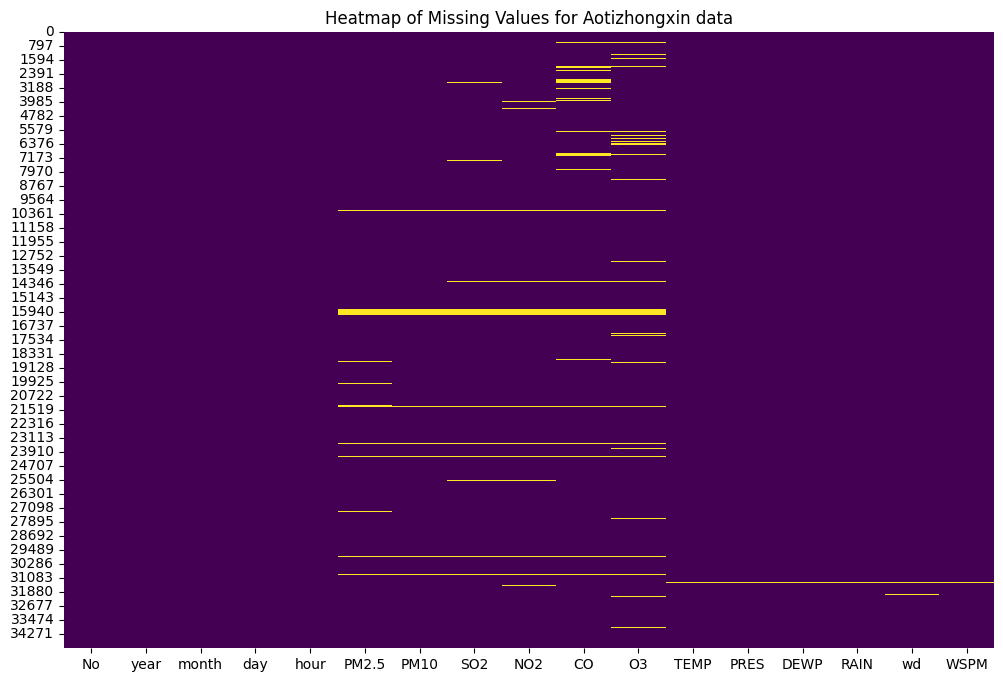

In [83]:
plt.figure(figsize=(12, 8))
sns.heatmap(first_station_df.isnull(), cbar=False, cmap='viridis')
plt.title(f"Heatmap of Missing Values for {first_station_name} data")
plt.show()

There are missing values for all features except NO, YEAR, MONTH, DAY & HOUR features.

### 5.2. Handling missingness

In [84]:
# Handle Missing Values using forward fill (ffill) and backward fill (bfill)
first_station_df = first_station_df.ffill().bfill()  # Apply ffill first, then bfill

# confirm missing values have been filled. 
missing_percentage = first_station_df.isnull().mean() * 100
print(f"Missing percentage of {first_station_name} data \n{missing_percentage} ")

Missing percentage of Aotizhongxin data 
No       0.0
year     0.0
month    0.0
day      0.0
hour     0.0
PM2.5    0.0
PM10     0.0
SO2      0.0
NO2      0.0
CO       0.0
O3       0.0
TEMP     0.0
PRES     0.0
DEWP     0.0
RAIN     0.0
wd       0.0
WSPM     0.0
dtype: float64 


### 5.3. Check for duplicate rows

In [ ]:
# check for duplicate rows
duplicate_rows = first_station_df[first_station_df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
if duplicate_rows.shape[0] > 0:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print(f"No duplicate rows found for {first_station_name} data")

Number of duplicate rows: 0
No duplicate rows found for Aotizhongxin data


### 5.4. Converting columns to date time & indexing of datetime columns

In [96]:
# Convert year, month, day, hour to datetime
first_station_df['datetime'] = pd.to_datetime(first_station_df[['year', 'month', 'day', 'hour']])

# Set 'datetime' as index
first_station_indexed = first_station_df.set_index('datetime')

In [97]:
first_station_indexed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      35064 non-null  int64  
 1   year    35064 non-null  int64  
 2   month   35064 non-null  int64  
 3   day     35064 non-null  int64  
 4   hour    35064 non-null  int64  
 5   PM2.5   35064 non-null  float64
 6   PM10    35064 non-null  float64
 7   SO2     35064 non-null  float64
 8   NO2     35064 non-null  float64
 9   CO      35064 non-null  float64
 10  O3      35064 non-null  float64
 11  TEMP    35064 non-null  float64
 12  PRES    35064 non-null  float64
 13  DEWP    35064 non-null  float64
 14  RAIN    35064 non-null  float64
 15  wd      35064 non-null  object 
 16  WSPM    35064 non-null  float64
dtypes: float64(11), int64(5), object(1)
memory usage: 4.8+ MB


### 5.5 Add a feature for wind direction categories in degrees

In [99]:
# Define mapping for wind direction to degrees
wind_direction_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Create a 'wd_direction with numerical values
first_station_indexed['wd_direction'] = first_station_indexed['wd'].map(wind_direction_map)

# confirm conversion
first_station_indexed.head(10)

No  year  month  day  hour  PM2.5  PM10   SO2   NO2  \
datetime                                                                   
2013-03-01 00:00:00   1  2013      3    1     0    4.0   4.0   4.0   7.0   
2013-03-01 01:00:00   2  2013      3    1     1    8.0   8.0   4.0   7.0   
2013-03-01 02:00:00   3  2013      3    1     2    7.0   7.0   5.0  10.0   
2013-03-01 03:00:00   4  2013      3    1     3    6.0   6.0  11.0  11.0   
2013-03-01 04:00:00   5  2013      3    1     4    3.0   3.0  12.0  12.0   
2013-03-01 05:00:00   6  2013      3    1     5    5.0   5.0  18.0  18.0   
2013-03-01 06:00:00   7  2013      3    1     6    3.0   3.0  18.0  32.0   
2013-03-01 07:00:00   8  2013      3    1     7    3.0   6.0  19.0  41.0   
2013-03-01 08:00:00   9  2013      3    1     8    3.0   6.0  16.0  43.0   
2013-03-01 09:00:00  10  2013      3    1     9    3.0   8.0  12.0  28.0   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
datetime                                                                
2013-03-01 00:00:00  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4   
2013-03-01 01:00:00  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   4.7   
2013-03-01 02:00:00  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6   
2013-03-01 03:00:00  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1   
2013-03-01 04:00:00  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   2.0   
2013-03-01 05:00:00  400.0  66.0  -2.2  1025.6 -19.6   0.0    N   3.7   
2013-03-01 06:00:00  500.0  50.0  -2.6  1026.5 -19.1   0.0  NNE   2.5   
2013-03-01 07:00:00  500.0  43.0  -1.6  1027.4 -19.1   0.0  NNW   3.8   
2013-03-01 08:00:00  500.0  45.0   0.1  1028.3 -19.2   0.0  NNW   4.1   
2013-03-01 09:00:00  400.0  59.0   1.2  1028.5 -19.3   0.0    N   2.6   

                     wd_direction  
datetime                           
2013-03-01 00:00:00         337.5  
2013-03-01 01:00:00           0.0  
2013-03-01 02:00:00         337.5  
2013-03-01 03:00:00         315.0  
2013-03-01 04:00:00           0.0  
2013-03-01 05:00:00           0.0  
2013-03-01 06:00:00          22.5  
2013-03-01 07:00:00         337.5  
2013-03-01 08:00:00         337.5  
2013-03-01 09:00:00           0.0

### 5.6 Set frequency of data to change it to timeseries data

In [102]:
# set the correct frequency
first_station_indexed = first_station_indexed.asfreq('h')  # set hourly frequency

# confirm setting of frequency
first_station_indexed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Freq: h
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            35064 non-null  int64  
 1   year          35064 non-null  int64  
 2   month         35064 non-null  int64  
 3   day           35064 non-null  int64  
 4   hour          35064 non-null  int64  
 5   PM2.5         35064 non-null  float64
 6   PM10          35064 non-null  float64
 7   SO2           35064 non-null  float64
 8   NO2           35064 non-null  float64
 9   CO            35064 non-null  float64
 10  O3            35064 non-null  float64
 11  TEMP          35064 non-null  float64
 12  PRES          35064 non-null  float64
 13  DEWP          35064 non-null  float64
 14  RAIN          35064 non-null  float64
 15  wd            35064 non-null  object 
 16  WSPM          35064 non-null  float64
 17  wd_direction  35064 non-nu

### 5.7 Dropping unnecessary columns from the first stations data subset

In [104]:
# Drop unnecessary columns
columns_to_drop = ["No"]
cleaned_first_station_df = first_station_indexed.drop(columns=columns_to_drop, inplace=False)

# Print summary of cleaned data
print("\n--- Processed Data Info ---")
print(cleaned_first_station_df.info())


--- Processed Data Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Freq: h
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          35064 non-null  int64  
 1   month         35064 non-null  int64  
 2   day           35064 non-null  int64  
 3   hour          35064 non-null  int64  
 4   PM2.5         35064 non-null  float64
 5   PM10          35064 non-null  float64
 6   SO2           35064 non-null  float64
 7   NO2           35064 non-null  float64
 8   CO            35064 non-null  float64
 9   O3            35064 non-null  float64
 10  TEMP          35064 non-null  float64
 11  PRES          35064 non-null  float64
 12  DEWP          35064 non-null  float64
 13  RAIN          35064 non-null  float64
 14  wd            35064 non-null  object 
 15  WSPM          35064 non-null  float64
 16  wd_direction  35064 non-null  float64
dt

In [105]:
print(cleaned_first_station_df.head())

                     year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  \
datetime                                                                      
2013-03-01 00:00:00  2013      3    1     0    4.0   4.0   4.0   7.0  300.0   
2013-03-01 01:00:00  2013      3    1     1    8.0   8.0   4.0   7.0  300.0   
2013-03-01 02:00:00  2013      3    1     2    7.0   7.0   5.0  10.0  300.0   
2013-03-01 03:00:00  2013      3    1     3    6.0   6.0  11.0  11.0  300.0   
2013-03-01 04:00:00  2013      3    1     4    3.0   3.0  12.0  12.0  300.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  wd_direction  
datetime                                                                      
2013-03-01 00:00:00  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4         337.5  
2013-03-01 01:00:00  77.0  -1.1  1023.2 -18.2   0.0    N   4.7           0.0  
2013-03-01 02:00:00  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6         337.5  
2013-03-01 03:00:00  72.0  -1.4  1024.5 -19.4   0.0

17 features for EDA

In [107]:
# save the  cleaned data frame as a csv file for EDA.
cleaned_first_station_df.to_csv('Aotizhongxin_clean_data.csv', index=True)

## 6.0. Exploratory Data Analysis

### 6.1. Univariate Analysis

#### 6.1.1 Summary statistics of air pollutants

In [61]:
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
stats_summary = cleaned_first_station_df[pollutants].describe()
print(f"Summary Statistics for {first_station_name} weather station")
print(stats_summary)

Summary Statistics for Aotizhongxin weather station
              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      83.163652    110.733262     17.573220     59.290826   1267.071954   
std       82.290700     95.375762     22.819302     37.007696   1242.121599   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       60.000000     88.000000      9.000000     54.000000    900.000000   
75%      114.000000    157.000000     22.000000     81.000000   1600.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3  
count  35064.000000  
mean      55.184512  
std       57.582259  
min        0.214200  
25%        7.000000  
50%       41.000000  
75%       82.000000  
max      423.000000  


The summary statistics describe the distribution of six major air pollutants (PM2.5, PM10, SO2, NO2, CO, and O3) in Aotizhongxin station over **35,064 recorded observations**.

**1. PM2.5 (Fine Particulate Matter)**
- **Mean:** 83.16 µg/m³ → On average, PM2.5 levels are high and exceed the WHO air quality guideline of **15 µg/m³ (annual mean)**.
- **Standard Deviation:** 82.29 → High variability, indicating fluctuating pollution levels.
- **Min - Max:** 3 - 898 → Extremely high peak values, showing occasional severe pollution episodes.
- **Median (50%):** 60 → Half of the values are below 60, indicating a skewed distribution with extreme highs.

 - **Conclusion:** Frequent high pollution events with large variability.

**2. PM10 (Coarse Particulate Matter)**
- **Mean:** 110.73 µg/m³ → Also exceeds WHO’s guideline of **45 µg/m³ (24-hour mean)**.
- **Standard Deviation:** 95.37 → High variation, similar to PM2.5.
- **Min - Max:** 2 - 984 → Extremely high max values, likely from dust storms or industrial emissions.
- **Median:** 88 → Most readings are below 88, but high pollution spikes push the mean upwards.

- **Conclusion:** High levels of coarse particles, likely from industrial or vehicle emissions and dust storms.

**3. SO₂ (Sulfur Dioxide)**
- **Mean:** 17.57 ppb → Generally within global safety limits, but occasional peaks.
- **Standard Deviation:** 22.82 → Moderate variation.
- **Min - Max:** 0.29 - 341 → Occasional extreme pollution events.
- **Median:** 9 → Most of the time, SO₂ remains low, but industrial emissions may contribute to extreme values.

- **Conclusion:** Mostly controlled, but spikes suggest industrial emissions.

**4. NO₂ (Nitrogen Dioxide)**
- **Mean:** 59.29 ppb → Significantly higher than WHO’s annual mean guideline of **10 ppb**.
- **Standard Deviation:** 37.00 → Moderate variability.
- **Min - Max:** 2 - 290 → High peaks indicate possible heavy traffic or industrial activity.
- **Median:** 54 → A significant portion of the data shows high NO₂ levels.

**Conclusion:** Likely caused by vehicle emissions and industrial sources, frequently exceeding safe levels.

**5. CO (Carbon Monoxide)**
- **Mean:** 1267.07 ppb (~1.27 ppm) → Generally below the WHO guideline of **4 ppm (8-hour mean)**.
- **Standard Deviation:** 1242.12 → Very high variation, meaning occasional severe pollution.
- **Min - Max:** 100 - 10,000 → Some extremely high CO levels, possibly due to traffic congestion or industrial emissions.
- **Median:** 900 → CO levels are consistently elevated, even in the middle range.

- **Conclusion:** While average levels seem safe, occasional extreme peaks indicate localized pollution hotspots.

**6. O₃ (Ozone)**
- **Mean:** 55.18 ppb → Often exceeding WHO’s 8-hour mean guideline of **50 ppb**.
- **Standard Deviation:** 57.58 → Large fluctuations in ozone levels.
- **Min - Max:** 0.21 - 423 → Some extremely high values, likely from photochemical reactions under sunlight.
- **Median:** 41 → Ozone is moderate most of the time but has serious peak events.

- **Conclusion:** Periodic high ozone pollution, likely from **photochemical smog** due to NO₂ and sunlight interaction.

**Final Insights**
- **PM2.5 and PM10 are dangerously high** with occasional extreme peaks.
- **NO₂ levels are consistently high**, indicating major traffic or industrial contributions.
- **CO levels vary greatly**, suggesting pollution hotspots.
- **Ozone pollution is seasonal** and affected by sunlight and NO₂ emissions.

#### 6.1.2 Summary Statistics of Meteorological Data

In [62]:
# Define the metereological data
metereologicals = ['TEMP', 'PRES', 'DEWP','RAIN','WSPM','wd_direction']

met_stats_summary = cleaned_first_station_df[metereologicals].describe()
print(f"Summary Statistics for {first_station_name} weather station")
print(met_stats_summary)

Summary Statistics for Aotizhongxin weather station
               TEMP          PRES          DEWP          RAIN          WSPM  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      13.581908   1011.851716      3.120283      0.067383      1.708470   
std       11.400761     10.404909     13.690615      0.909798      1.204171   
min      -16.800000    985.900000    -35.300000      0.000000      0.000000   
25%        3.100000   1003.300000     -8.100000      0.000000      0.900000   
50%       14.500000   1011.400000      3.800000      0.000000      1.400000   
75%       23.300000   1020.100000     15.600000      0.000000      2.200000   
max       40.500000   1042.000000     28.500000     72.500000     11.200000   

       wd_direction  
count  35064.000000  
mean     144.250513  
std      103.296269  
min        0.000000  
25%       45.000000  
50%      112.500000  
75%      225.000000  
max      337.500000  


Summary statistics of key weather parameters at the **Aotizhongxin** station over **35,064 recorded observations**. 

**1. Temperature (TEMP) [°C]**
- **Mean:** **13.58°C** → Moderate average temperature.
- **Standard Deviation:** **11.40°C** → Large seasonal variation.
- **Min - Max:** **-16.8°C to 40.5°C** → Extreme cold and hot conditions recorded.
- **Median:** **14.5°C** → Most of the time, temperatures are in the moderate range.
- **Conclusion:** The location experiences significant seasonal temperature fluctuations.

**2. Pressure (PRES) [hPa]**
- **Mean:** **1011.85 hPa** → Close to the standard atmospheric pressure (~1013 hPa).
- **Standard Deviation:** **10.40 hPa** → Small variations.
- **Min - Max:** **985.9 - 1042 hPa** → Occasionally lower pressures, possibly linked to weather systems like storms.
- **Median:** **1011.4 hPa** → The middle value aligns closely with the mean.
- **Conclusion:** Pressure remains relatively stable, with occasional weather system influences.

**3. Dew Point (DEWP) [°C]**
- **Mean:** **3.12°C** → Cool and dry conditions are common.
- **Standard Deviation:** **13.69°C** → Large fluctuations, indicating seasonal moisture variations.
- **Min - Max:** **-35.3°C to 28.5°C** → Extreme dry/cold and humid conditions occur.
- **Median:** **3.8°C** → The distribution is slightly skewed towards positive values.
- **Conclusion:** Significant seasonal shifts between dry winters and humid summers.

**4. Rainfall (RAIN) [mm]**
- **Mean:** **0.067 mm** → Very little rainfall on average.
- **Standard Deviation:** **0.91 mm** → Some variability, but most values are low.
- **Min - Max:** **0 - 72.5 mm** → Rare but heavy rainfall events occur.
- **Percentiles (25%, 50%, 75%):** **0 mm** → Most days recorded no rainfall.
- **Conclusion:** The area experiences dry conditions with occasional heavy rainfall.

**5. Wind Speed (WSPM) [m/s]**
- **Mean:** **1.71 m/s** → Generally light winds.
- **Standard Deviation:** **1.20 m/s** → Some variability.
- **Min - Max:** **0 - 11.2 m/s** → Calm days (0 m/s) to occasional strong winds.
- **Median:** **1.4 m/s** → Most of the time, wind speed remains low
- **Conclusion:** Light winds dominate, but occasional strong gusts occur.

**6. Wind Direction (wd_direction) [Degrees]**
- **Mean:** **144.25°** → Winds predominantly come from the **southeast** (90°-180°).
- **Standard Deviation:** **103.30°** → Large variation, meaning winds shift direction often.
- **Min - Max:** **0° - 337.5°** → Covers all possible wind directions.
- **Median:** **112.5°** → Winds are mostly from the **east-southeast**.
- **Conclusion:** The region experiences variable wind directions, with a predominant southeast wind.

**Final Insights**
- **Large seasonal variations** in **temperature** and **dew point**.
- **Mostly dry conditions**, with **rare heavy rainfall events**.
- **Pressure remains stable**, with minor variations.
- **Light winds dominate**, but occasional strong gusts occur.
- **Wind direction is variable**, but predominantly from the **southeast**.

### 6.2. Trend analysis of air pollutants

#### 6.2.1 Daily trends over time

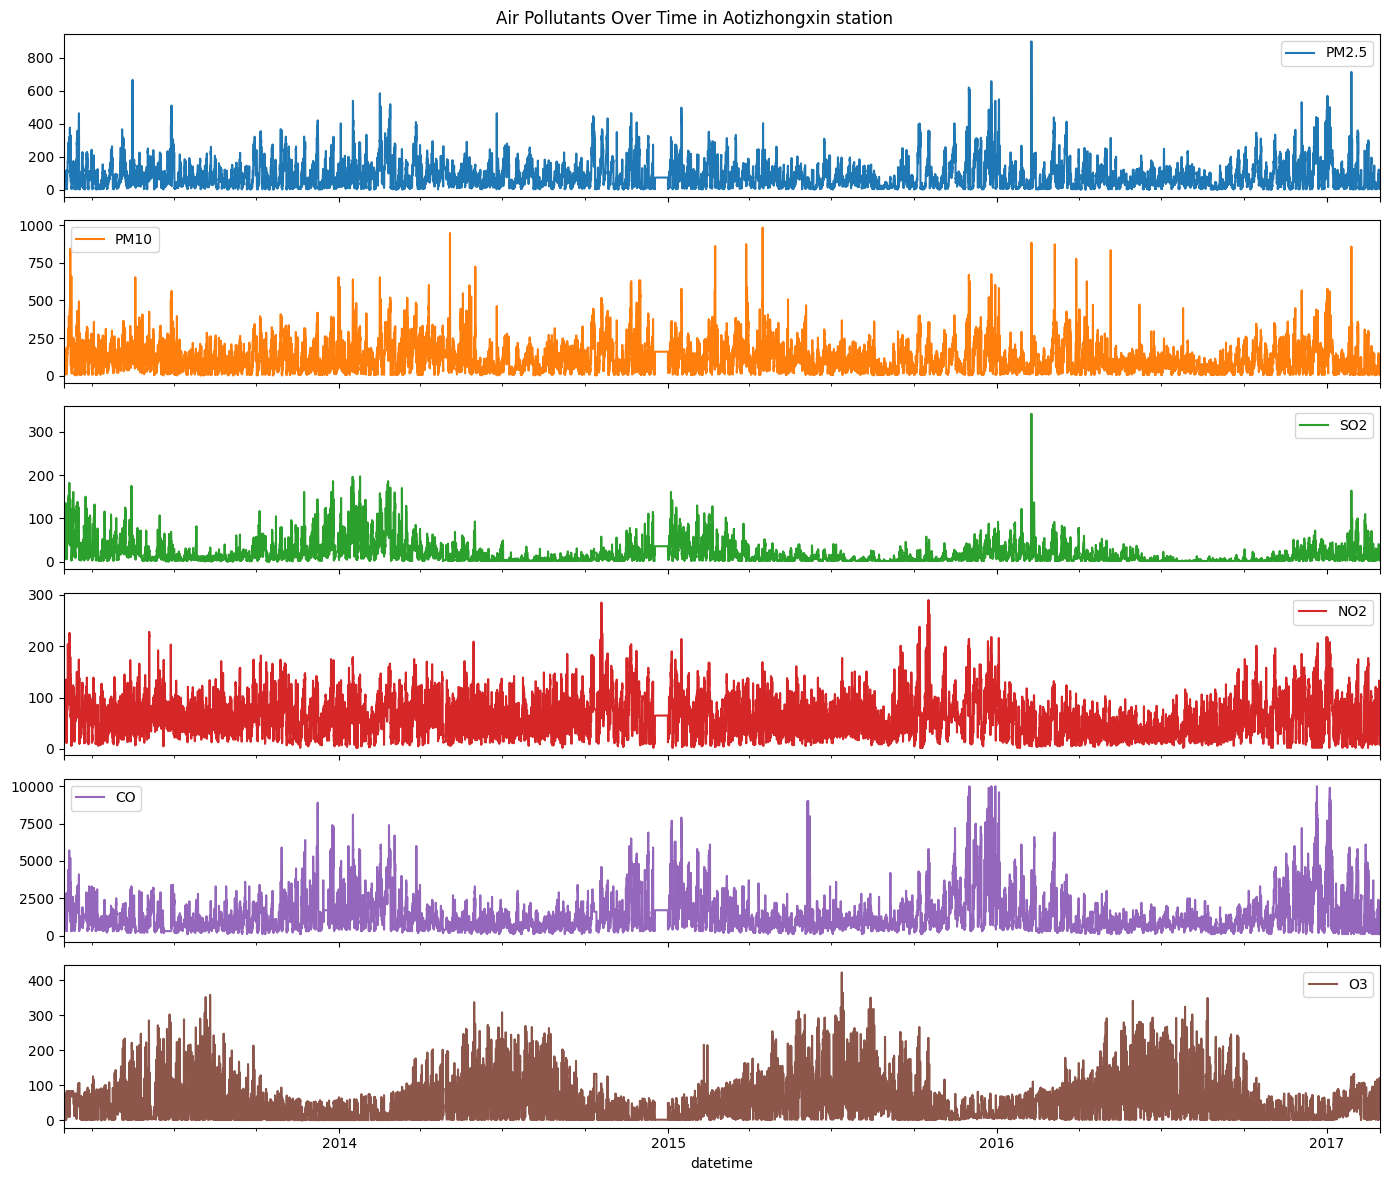

In [89]:
# plot the air pollutants over time
# Define the pollutants
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Create subplots
cleaned_first_station_df[pollutants].plot(
    subplots=True, 
    layout=(6,1), 
    figsize=(14,12), 
    sharex=True, # Ensures all plots share the same x-axis (time).
    title= f"Air Pollutants Over Time in {first_station_name} station")

# Adjust layout
plt.tight_layout()
plt.show()

**Interpretation of Air Pollutants Over Time in Aotizhongxin Station**

The time-series plot displays the variation in air pollutant concentrations from **2013 to 2017** at the **Aotizhongxin weather station**. Each subplot represents a different pollutant:

1. **PM2.5 (Blue)**
   - Fluctuates significantly over time, with **frequent spikes above 200 µg/m³**.
   - Peaks suggest periodic high pollution events (e.g., winter seasons or industrial activity).
   
2. **PM10 (Orange)**
   - Shows a similar trend to **PM2.5**, but with larger fluctuations.
   - Multiple peaks exceeding **750 µg/m³**, indicating severe air pollution events.
   
3. **SO2 (Green)**
   - Generally lower values, with most concentrations **below 100 µg/m³**.
   - Occasional spikes, possibly linked to local emissions or seasonal effects.
   
4. **NO2 (Red)**
   - More stable compared to **PM2.5 and PM10**, but still **highly variable**.
   - Peaks align with **winter months**, likely due to increased heating and vehicle emissions.
   
5. **CO (Purple)**
   - Follows a distinct seasonal pattern, with **higher values in winter**.
   - Spikes exceeding **5000 µg/m³**, indicating periods of poor air quality.
   
6. **O3 (Brown)**
   - Opposite trend to **CO**—higher in summer and lower in winter.
   - Peaks above **300 µg/m³**, likely due to increased sunlight-driven ozone formation.

**Key Observations**
- **Seasonal Trends:** Pollutants like **CO, NO2, and PM2.5** are higher in winter, likely due to heating and stagnant air conditions. **O3 peaks in summer**, driven by photochemical reactions.
- **Periodic Spikes:** Large pollution events occur at different times, possibly due to meteorological factors (e.g., wind, temperature inversions).
- **PM10 & PM2.5 Correlation:** Their trends are closely aligned, indicating common sources (e.g., vehicular emissions, industrial activities).

#### 6.2.2. Seasonal Trends

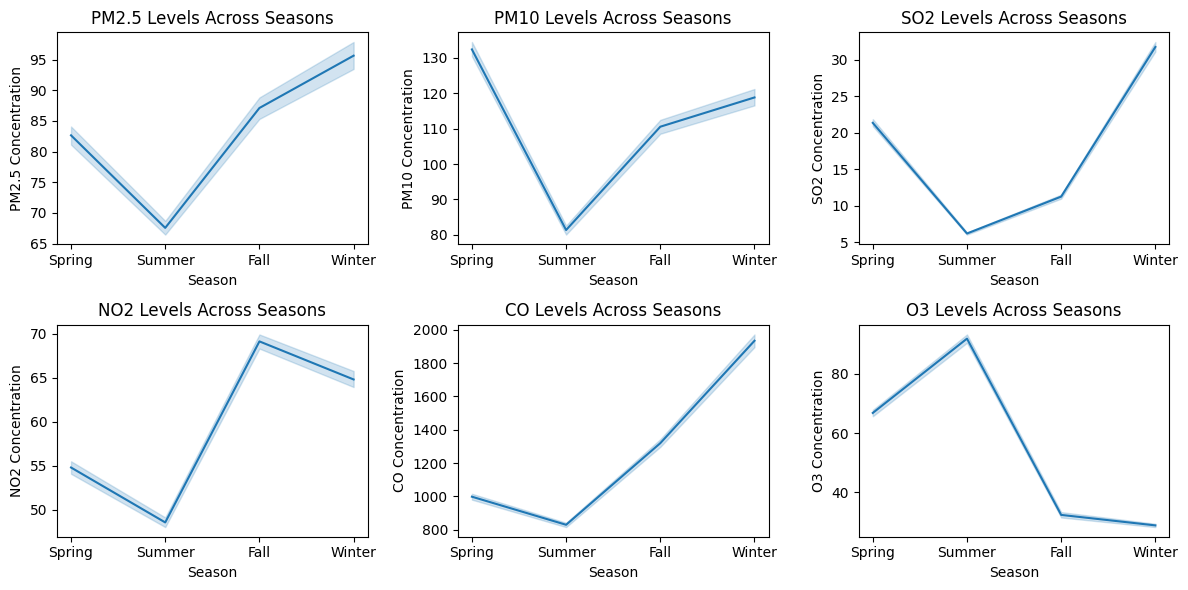

In [ ]:
# Extract relevant time features
cleaned_first_station_df["season"] = cleaned_first_station_df["month"].map({12: "Winter", 1: "Winter", 2: "Winter",
                                3: "Spring", 4: "Spring", 5: "Spring",
                                6: "Summer", 7: "Summer", 8: "Summer",
                                9: "Fall", 10: "Fall", 11: "Fall"})

# Seasonal Line Plot Analysis
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=cleaned_first_station_df["season"], y=cleaned_first_station_df[pollutant])
    plt.title(f"{pollutant} Levels Across Seasons")
    plt.xlabel("Season")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

This visualization presents seasonal trends in air pollution levels for different pollutants.

Observations:
1. PM2.5 & PM10 (Top-left & Top-middle)
   - Lowest levels in summer, highest in winter.
   - Likely influenced by winter heating emissions, stagnant air, and temperature inversions trapping pollutants.

2. SO2 & NO2 (Top-right & Bottom-left)
   - Lowest in summer, highest in winter.
   - SO2 increase in winter suggests higher fossil fuel combustion (coal, biomass burning).
   - NO2 is vehicle-related, and cold weather leads to higher concentrations due to less dispersion.

3. CO (Bottom-middle)
   - Lowest in summer, rising in fall and peaking in winter.
   - Indicates higher carbon monoxide emissions from heating and industrial activities in colder months.

4. O3 (Bottom-right)
   - Opposite trend to other pollutants—highest in summer, lowest in winter.
   - More sunlight in summer increases photochemical reactions that form ozone.
   - Less sunlight and lower temperatures in winter reduce ozone production.

Overall insights:
- Winter sees a significant rise in most pollutants due to heating emissions, stagnant air, and temperature inversions.
- Summer has the cleanest air except for ozone, which peaks due to stronger solar radiation.
- Seasonal variations align with meteorological influences on pollutant dispersion and chemical reactions.

#### 6.2.3 Monthly Trends

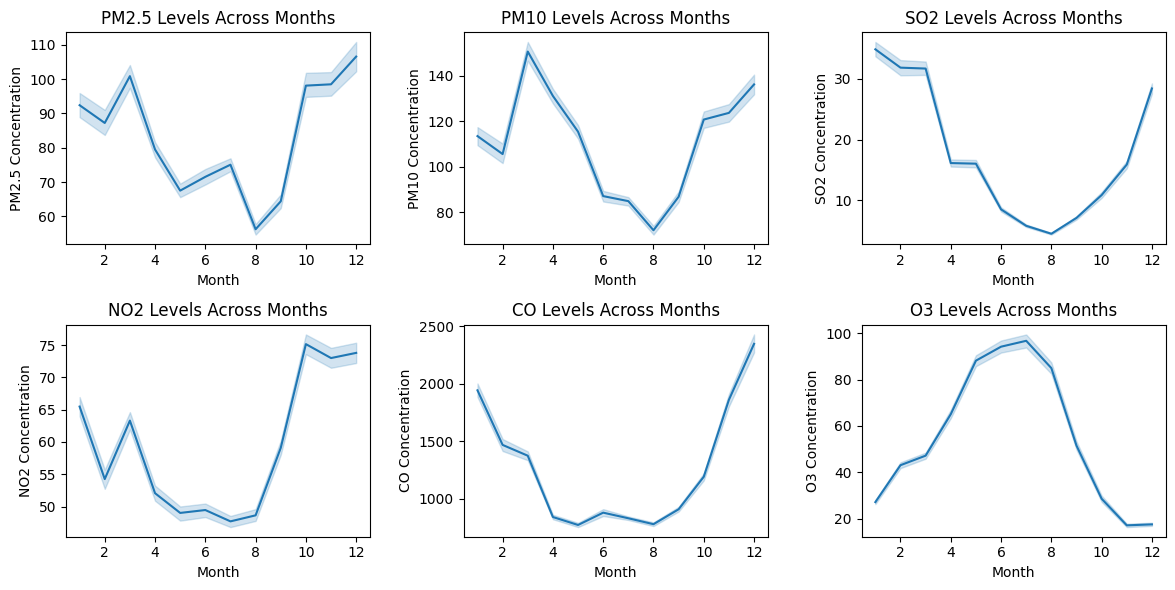

In [106]:
# Monthly Trend Analysis
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=cleaned_first_station_df["month"], y=cleaned_first_station_df[pollutant])
    plt.title(f"{pollutant} Levels Across Months")
    plt.xlabel("Month")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

Monthly Trends in Pollutant Levels (Aotizhongxin Station)

These plots illustrate the seasonal variations in pollutant concentrations over a typical year.

Key Observations:
1. PM2.5 & PM10 (Top-left & Top-middle)
   - Higher concentrations in winter (Dec-Jan) and spring (Mar-Apr).
   - Lowest levels during summer (June-Aug).
   - Likely influenced by heating activities in winter, dust storms in spring, and better dispersion in summer.

2. SO2 (Top-right)
   - Peak levels in winter (Dec-Feb), lowest in summer (Jun-Aug).
   - Strongly linked to coal combustion for heating.

3. NO2 (Bottom-left)
   - Sharp decline from winter to summer lowest in June-Aug.
   - Peaks again in December possibly due to increased vehicle emissions and heating-related activities.

4. CO (Bottom-middle)
   - Similar pattern to NO2 with high winter values and a summer drop.
   - Suggests a strong influence of combustion sources (vehicles, heating).

5. O3 (Bottom-right)
   - Opposite trend: peaks in summer (June-Aug) and declines in winter.
   - Ozone formation is driven by strong sunlight and photochemical reactions explaining higher levels in warm months.

Overall Insights:
- Winter months show high PM2.5, PM10, SO2, NO2, and CO levels likely due to heating, vehicle emissions, and poor atmospheric dispersion.
- Summer months have higher O3 levels driven by stronger sunlight and photochemistry.
- Spring and autumn act as transition periods between these extremes.

#### 6.2.4. Yearly Trends

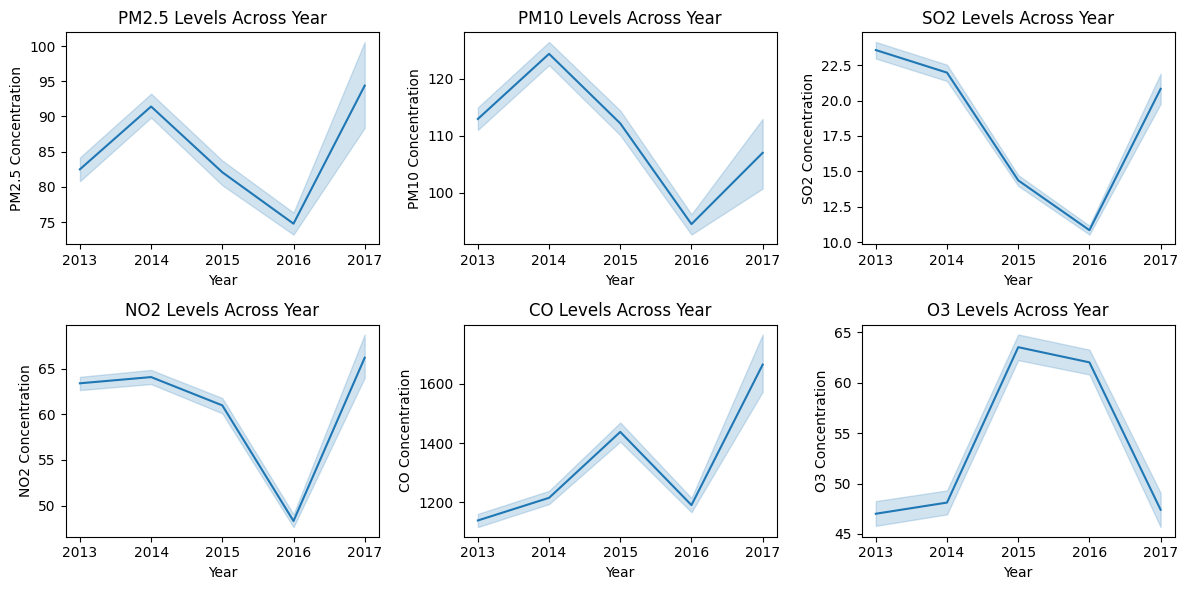

In [92]:
# Yearly Trends Analysis
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=cleaned_first_station_df["year"], y=cleaned_first_station_df[pollutant])
    plt.title(f"{pollutant} Levels Across Year")
    plt.xlabel("Year")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

Interpretation of Annual Trends in Pollutant Levels (Aotizhongxin Station)

The plots depict the average concentration trends of pollutants from 2013 to 2017 along with confidence intervals.

Key Observations:
1. PM2.5 & PM10 (Top-left & Top-middle)
   - Show an increase from 2013 to 2014 followed by a decline until 2016
   - A sharp rise in 2017 possibly due to changes in emissions, weather conditions, or policy shifts.

2. SO2 (Top-right)
   - A steady decline from 2013 to 2016 indicating improved air quality control measures (e.g., reduced coal burning).
   - However, a noticeable increase in 2017 which could be due to temporary changes in industrial activity or energy production.

3. NO2 (Bottom-left)
   - Relatively stable until 2015 followed by a decline in 2016.
   - A sharp increase in 2017 suggesting a rise in traffic emissions or industrial sources.

4. CO (Bottom-middle)
   - A general upward trend from 2013 to 2015 indicating worsening air quality.
   - A decline in 2016 followed by a sharp increase in 2017 possibly linked to heating needs in winter or industrial activity.

5. O3 (Bottom-right)
   - Steady increase from 2013 to 2015 peaking in 2015.
   - Declines slightly in 2016 and drops significantly in 2017.
   - This aligns with ozone formation being higher in summer and possibly affected by changes in precursor pollutants (e.g., NO2 and VOCs).

Possible Explanations for Trends:
- 2013-2016: Possible implementation of stricter air pollution controls, reducing SO2, NO2, and PM concentrations.
- 2017 Increase: Suggests a resurgence in pollution sources possibly due to economic or industrial activity changes.

### 6.3. Distribution of pollutants over time

#### 6.3.1. Monthly Distribution of Pollutants

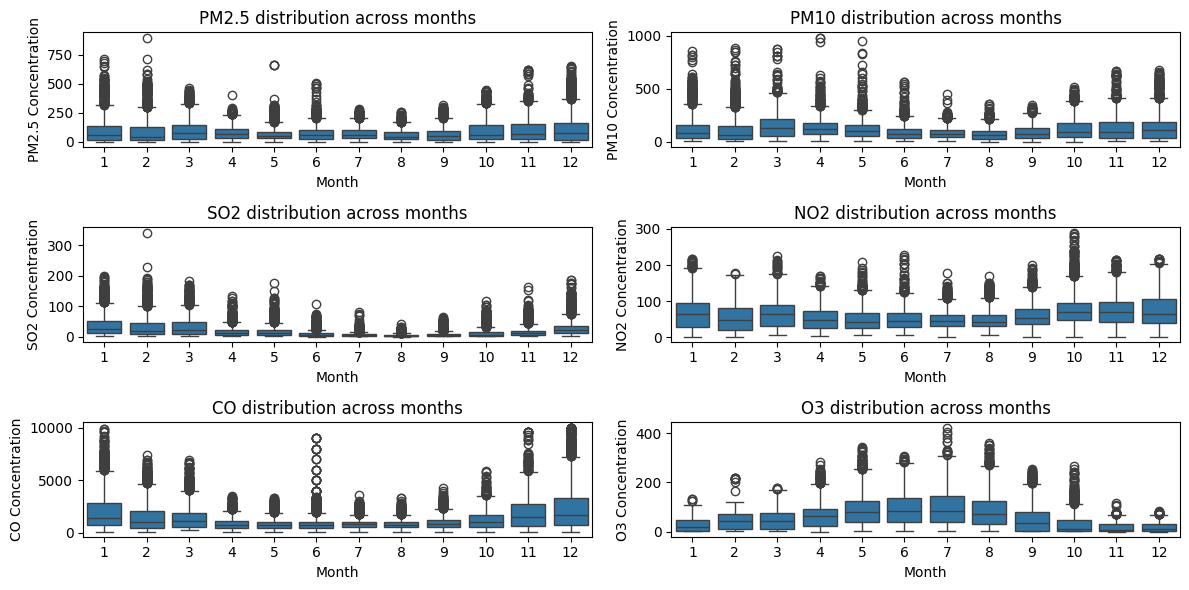

In [104]:
# Monthly distribution of pollutants
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=cleaned_first_station_df["month"], y=cleaned_first_station_df[pollutant])
    plt.title(f"{pollutant} distribution across months")
    plt.xlabel("Month")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

The boxplot visualization provides a monthly distribution of air pollutant concentrations.

Observations:
1. PM2.5 & PM10 (Top-left & Top-middle)
   - Highest in winter (Dec-Jan) and lowest in summer (Jun-Aug).
   - This trend suggests that cold weather increases air pollution due to heating activities, stagnant air, and temperature inversions.
   - The wide spread and high number of outliers indicate sporadic pollution spikes.

2. SO2 (Middle-left)
   - Significantly higher in winter months (Dec-Feb) compared to summer.
   - Likely due to increased coal and fuel combustion for heating.

3. NO2 (Middle-right)
   - Relatively stable but peaks during winter.
   - This is expected as NO2 is strongly linked to vehicle emissions, which can accumulate more in winter due to lower dispersion.

4. CO (Bottom-left)
   - Extreme variability with highest concentrations in winter months.
   - Winter heating and reduced dispersion lead to accumulation of CO in the atmosphere.

5. O3 (Bottom-right)
   - Opposite trend to other pollutants—highest in summer, lowest in winter.
   - This is because ozone is a secondary pollutant, formed by photochemical reactions in sunlight.
   - More solar radiation in summer leads to higher O3 levels.

General Takeaways:
- Winter months have the highest air pollution (except for O3).
- Summer shows the lowest levels of pollutants but high O3.
- Significant outliers across months indicate occasional extreme pollution events.

#### 6.3.2. Seasonal Distribution of Pollutants

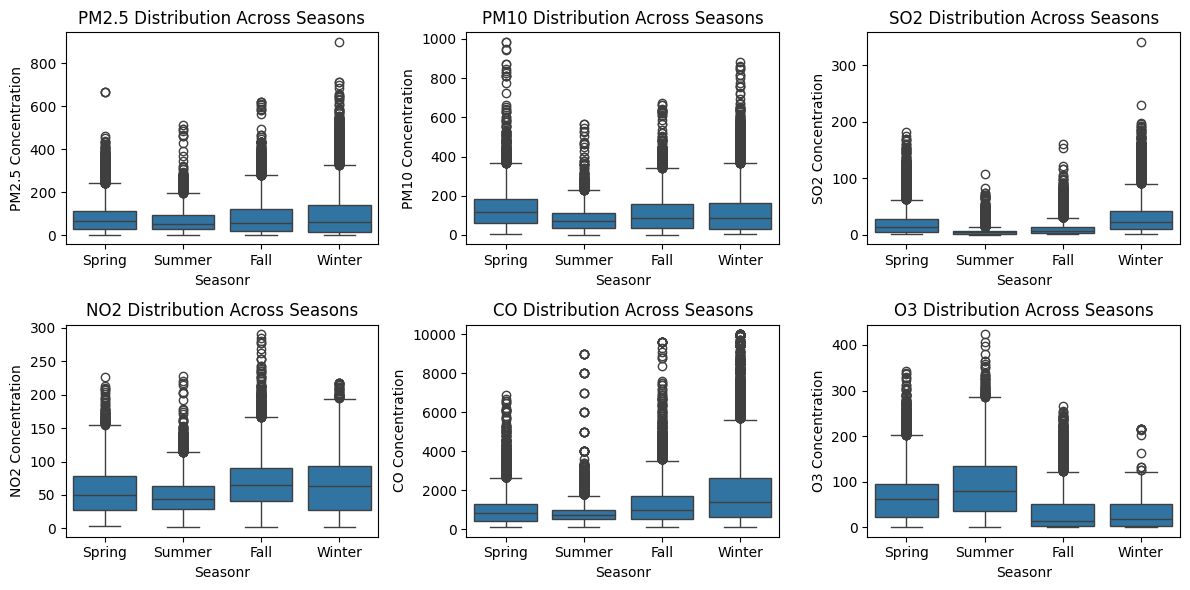

In [102]:
# Seasonal Distribution of Pollutants
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=cleaned_first_station_df["season"], y=cleaned_first_station_df[pollutant])
    plt.title(f"{pollutant} Distribution Across Seasons")
    plt.xlabel("Seasonr")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

1. PM2.5 (Fine Particulate Matter):
   - Winter has highest concentrations, with a larger spread and more outliers.
   - Spring and summer have relatively lower levels, but with occasional spikes, with summer having the lowest levels.
   - The presence of many outliers for each season suggests episodic high-pollution events
2. PM10 (Coarse Particulate Matter):
   - Follows a similar trend to PM2.5, with winter having the highest concentrations.
   - Summer and spring have slightly lower values, with summer having the lowest levels.
   - Winter shows more extreme values and outliers.
   - The presence of many outliers for each season suggests episodic high-pollution events
3. SO2 (Sulfur Dioxide):
   - Winter has significantly higher levels compared to other seasons with a large spread. This could be linked to increased coal or biomass burning in colder months.
   - Summer and fall have the lowest SO2 levels, with summer having the lowest levels. 
   - The presence of many outliers doe each season suggests episodic high-pollution events
4. NO2 (Nitrogen Dioxide):
   - Winter and fall have higher NO2 concentrations, likely due to more vehicular emissions and heating-related combustion.
   - The emissions for winter are more spread out with no outliers. Fall, summer and spring seasons have outliers which could suggest episodic high-pollution events
   - Summer and spring show lower concentrations, possibly due to atmospheric dispersion.
5. CO (Carbon Monoxide):
   - Winter shows a drastic increase in CO levels. With the levels being spread out.
   - The presence of high values and outliers in winter suggests combustion-related pollution.
   - Spring and summer have relatively lower levels, possibly due to better atmospheric mixing.
6. O3 (Ozone):
   - Highest in summer, which is expected because ozone formation is driven by sunlight and temperature.
   - Lowest in fall and winter since there is less sunlight for photochemical reactions, while fall shows the lowest median values.
   - Spring also has moderate levels. 

#### 6.3.3. Yearly Distribution of Pollutants

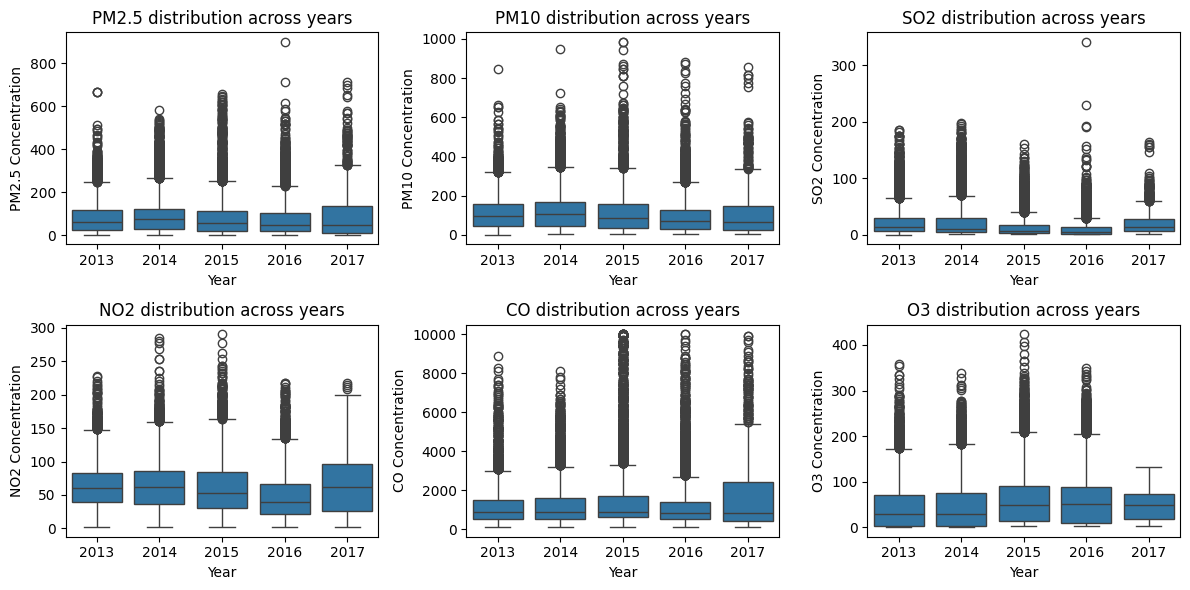

In [105]:
# Yearly Distribution of pollutants
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=cleaned_first_station_df["year"], y=cleaned_first_station_df[pollutant])
    plt.title(f"{pollutant} distribution across years")
    plt.xlabel("Year")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

Interpretation of Pollutant Levels Using Boxplots (Aotizhongxin Station)

These boxplots display the distribution of pollutant concentrations from 2013 to 2017. The box represents the interquartile range (IQR), with the median (central line) and outliers (dots) plotted beyond the whiskers.

Key Observations:
1. PM2.5 & PM10 (Top-left & Top-middle)
   - The median levels remain relatively stable across years.
   - Outliers are frequent and extreme, especially in 2015–2017.
   - A gradual increase in upper percentiles (75th percentile) in 2017, indicating a possible pollution spike.

2. SO2 (Top-right)
   - The median SO2 concentration remains low, suggesting effective pollution control.
   - However, 2016 has a higher number of extreme outliers, indicating sporadic high emissions.

3. NO2 (Bottom-left)
   - The median remains stable, but 2017 shows a wider IQR and more high-end outliers.
   - This suggests an increase in NO2 levels from transportation or industrial sources.

4. CO (Bottom-middle)
   - Wider spread and frequent outliers, especially in later years.
   - 2017 exhibits a significantly higher upper range, pointing to rising carbon monoxide emissions.

5. O3 (Bottom-right)
   - No significant shift in the median, but higher variability over the years.
   - 2016 and 2017 show a larger spread, which may be linked to seasonal changes and precursor emissions.

Overall Insights:
- Most pollutants show a stable median but increasing upper ranges, indicating that while average air quality may not have worsened, extreme pollution events have become more frequent.
- The rise in outliers (spikes in pollution levels) could be due to seasonal variations, policy changes, or industrial activity.

### 6.4. Trend Analysis of Meterological data

#### 6.4.1. Daily Trends of Metereological Data over time

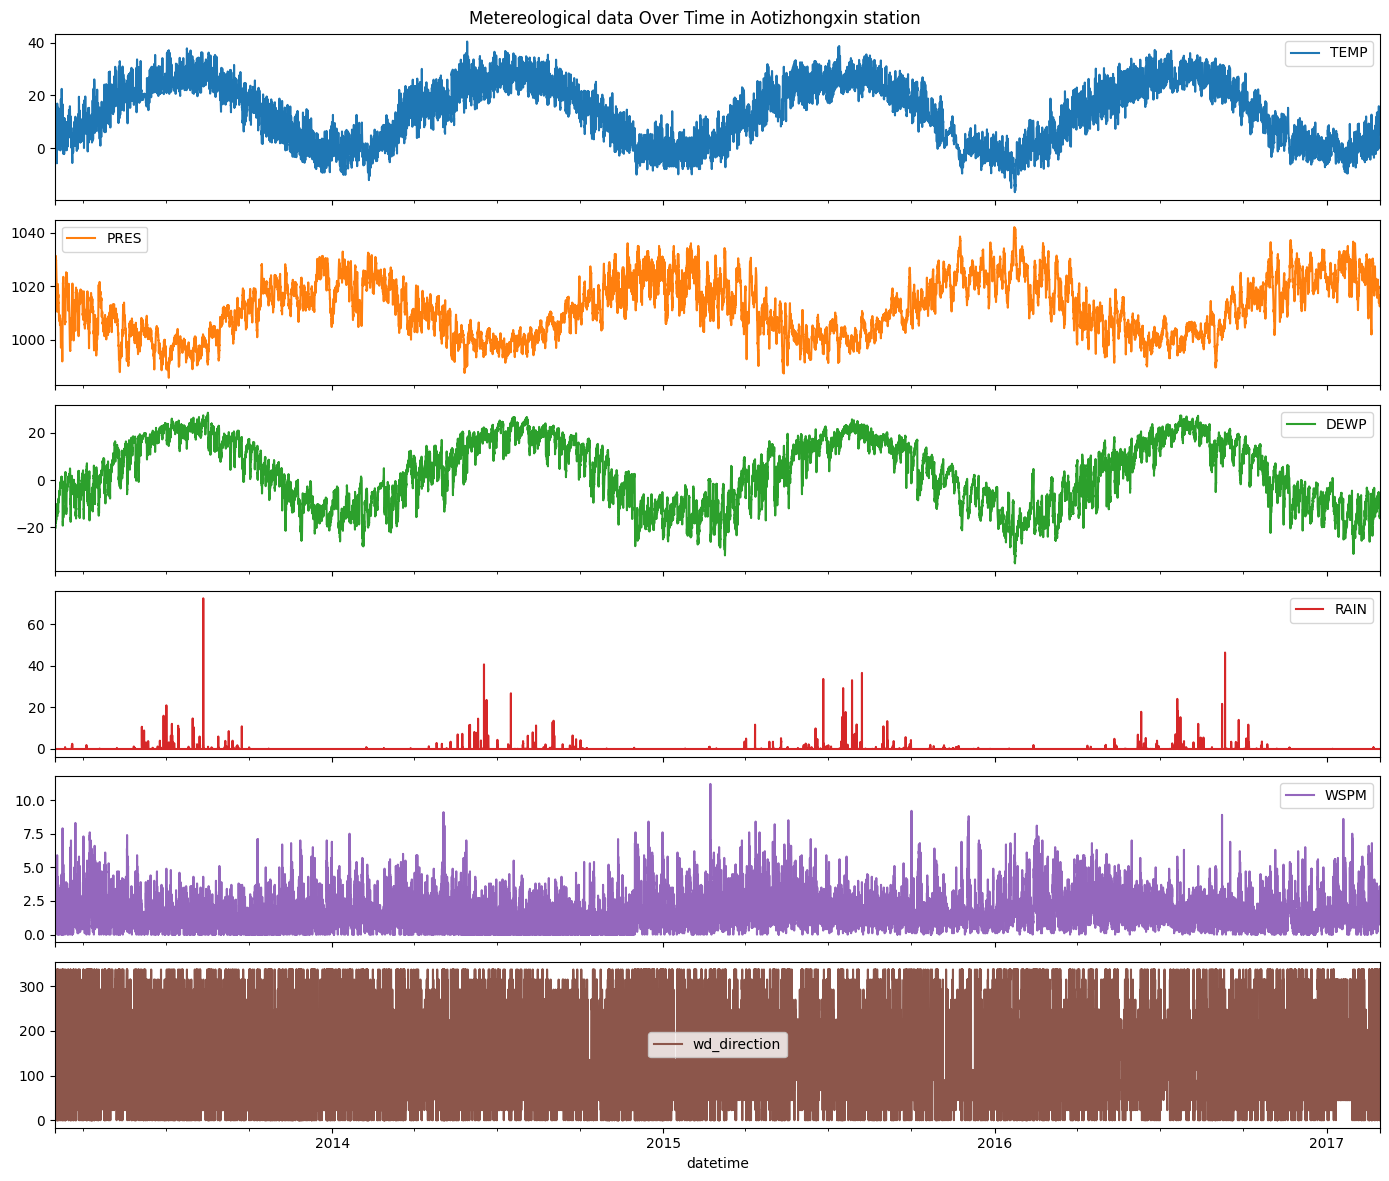

In [107]:
# plot the metereological data over time

# Create subplots
cleaned_first_station_df[metereologicals].plot(
    subplots=True, 
    layout=(6,1), 
    figsize=(14,12), 
    sharex=True,  # Ensures all plots share the same x-axis (time).
    title= f"Metereological data Over Time in {first_station_name} station")

# Adjust layout
plt.tight_layout()
plt.show()

The plot showcases the daily trends of various meteorological parameters over time from 2013 to 2017. 

**1. Temperature (TEMP)**
- **Trend:** The temperature exhibits a **clear seasonal cycle**, peaking during summer and dropping during winter.
- **Interpretation:** This follows expected seasonal variations, indicating the region experiences **cold winters and warm summers**.

**2️. Pressure (PRES)**
- **Trend:** Pressure follows a similar cyclical pattern to temperature, increasing in winter and decreasing in summer.
- **Interpretation:** This suggests that **high-pressure systems dominate during winter**, leading to stable weather, while **lower pressure in summer** is associated with more dynamic atmospheric conditions.

**3️. Dew Point (DEWP)**
- **Trend:** The dew point follows the temperature cycle, decreasing in winter and increasing in summer.
- **Interpretation:** A higher dew point in summer means **higher moisture levels in the air**, whereas lower values in winter indicate **drier air**.

**4. Rainfall (RAIN)**
- **Trend:** Rainfall appears **sporadic**, with occasional spikes that indicate intermittent heavy rainfall events.
- **Interpretation:** This suggests that **rainfall is not evenly distributed throughout the year** but occurs in bursts, likely associated with storms or monsoons.

**5️. Wind Speed (WSPM)**
- **Trend:** Wind speed fluctuates throughout the period, with occasional high spikes, but remains within a limited range.
- **Interpretation:** Periods of high wind may be associated with **weather disturbances, seasonal changes, or storms**, while lower wind speeds could correspond to stagnant air conditions.

6. wd_direction (Wind Direction)**  
- Appears random, fluctuating across all directions (0-360°)

**Key Observations & Insights**
- **Seasonality is strong** across temperature, pressure, and dew point, aligning with annual climatic cycles.  
- **Rainfall is sporadic**, indicating it may be influenced by **storm systems or monsoonal effects** rather than a uniform seasonal pattern.  
- **Wind speed fluctuations** suggest periods of high and low air movement, which can impact pollution dispersion.

#### 6.4.2 Monthly trends in weather

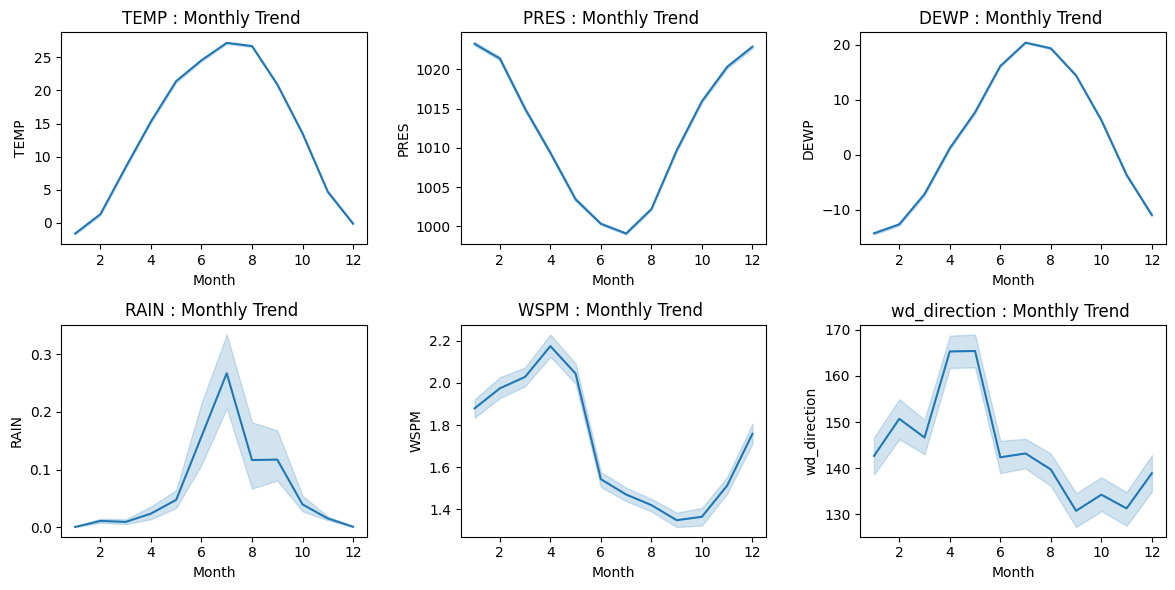

In [116]:
# Monthly Trend Analysis
plt.figure(figsize=(12, 6))
for i, metereological in enumerate(metereologicals, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=cleaned_first_station_df["month"], y=cleaned_first_station_df[metereological])
    plt.title(f"{metereological} : Monthly Trend ")
    plt.xlabel("Month")
    plt.ylabel(f"{metereological}")
plt.tight_layout()
plt.show()

This visualization shows **monthly trends** for key meteorological variables across the year.

 **Key Observations:**
1. **Temperature (TEMP)**
   - **Peaks in July (~27°C)** and **drops to near 0°C in winter**.
   - A clear **seasonal trend**, consistent with a temperate climate.

2. **Pressure (PRES)**
   - **Lowest in summer (June–July)** and **highest in winter (December–January)**.
   - Likely due to **seasonal shifts in atmospheric pressure**.

3. **Dew Point (DEWP)**
   - **Follows the temperature pattern**, peaking in summer and dipping in winter.
   - Indicates higher moisture content in warm months and drier conditions in cold months.

4. **Rainfall (RAIN)**
   - **Sharp peak around June–July** (likely monsoon or rainy season).
   - Suggests a **wet summer and dry winter** climate pattern.

5. **Wind Speed (WSPM)**
   - **Higher in winter (Jan–Feb) and early spring (March–April)**.
   - **Lowest in summer (July–August)**, possibly due to stable atmospheric conditions.

6. **Wind Direction (wd_direction)**
   - **Shifts significantly around April–June**, suggesting seasonal changes in predominant wind flow.
   - Likely connected to **monsoon patterns or synoptic weather changes**.

#### 6.4.3. Seasonal trends in weather

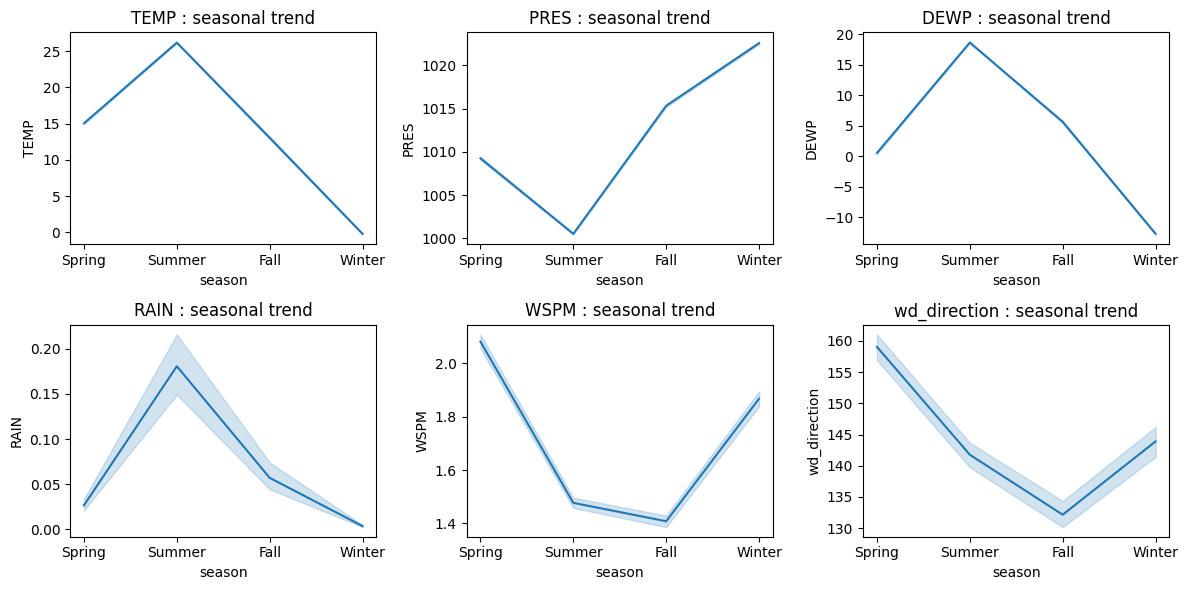

In [117]:
# Seasonal Trend Analysis
plt.figure(figsize=(12, 6))
for i, metereological in enumerate(metereologicals, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=cleaned_first_station_df["season"], y=cleaned_first_station_df[metereological])
    plt.title(f"{metereological} : seasonal trend")
    plt.xlabel("season")
    plt.ylabel(f"{metereological}")
plt.tight_layout()
plt.show()

This visualization shows **seasonal trends** for key meteorological variables. 

**Observations by Season:**
1. **Temperature (TEMP)**
   - **Peaks in Summer (~27°C)**.
   - **Lowest in Winter (~0°C)**.
   - A clear **seasonal temperature cycle**.

2. **Pressure (PRES)**
   - **Lowest in Summer (~1002 hPa)**.
   - **Highest in Winter (~1022 hPa)**.
   - Suggests **seasonal atmospheric pressure shifts**, possibly due to monsoon activity.

3. **Dew Point (DEWP)**
   - **Follows temperature trends**, highest in Summer (~20°C) and lowest in Winter (~-10°C).
   - Indicates **high humidity in summer and dry winter air**.

4. **Rainfall (RAIN)**
   - **Sharp peak in Summer (~0.2)**, possibly indicating monsoon season.
   - **Minimal rainfall in Winter**.
   - Confirms a **wet summer, dry winter pattern**.

5. **Wind Speed (WSPM)**
   - **Strongest in Spring & Winter (~2.0 m/s)**.
   - **Weakest in Summer (~1.3 m/s)**.
   - Suggests **stronger winds during transitional seasons**.

6. **Wind Direction (wd_direction)**
   - **Changes significantly across seasons**.
   - **Sharpest drop from Spring to Fall (~160° → 130°)**.
   - Likely represents **monsoon-driven wind shifts**.

**Overall Insights:**
- **Summer is the warmest and wettest season**, likely due to monsoons.
- **Winter is the driest and coldest season**, with high atmospheric pressure.
- **Seasonal wind shifts and variations** suggest **climatic influence from large-scale weather patterns**.

#### 6.4.4. Yearly trends in weather

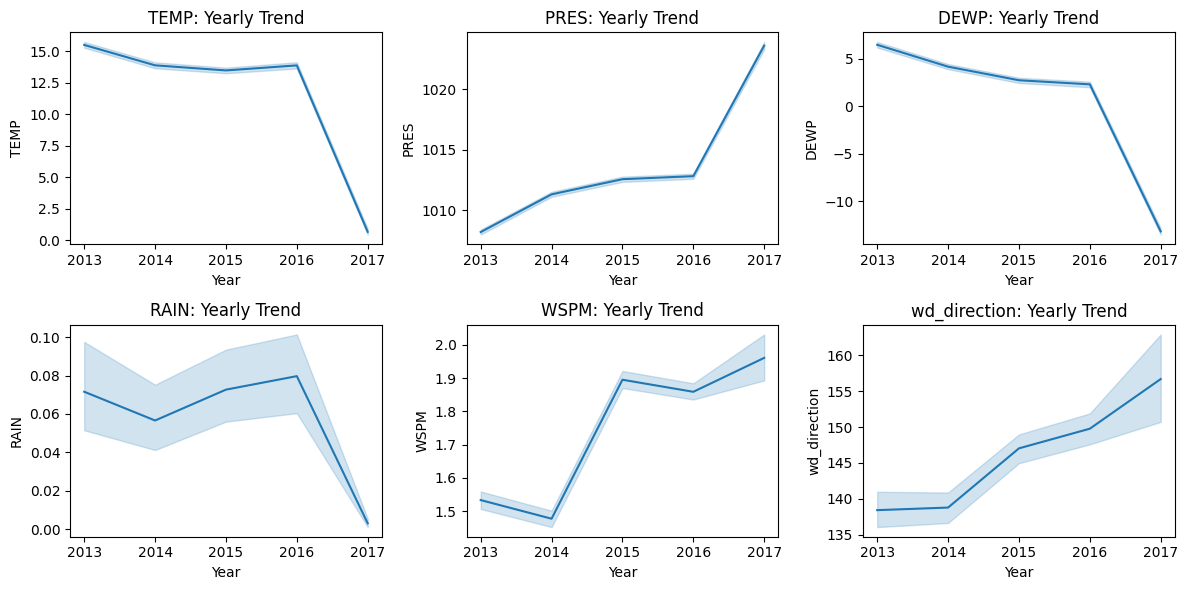

In [114]:
# Yearly Trends Analysis
plt.figure(figsize=(12, 6))
for i, metereological in enumerate(metereologicals, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=cleaned_first_station_df["year"], y=cleaned_first_station_df[metereological])
    plt.title(f"{metereological}: Yearly Trend")
    plt.xlabel("Year")
    plt.ylabel(f"{metereological}")
plt.tight_layout()
plt.show()

This visualization presents **yearly trends** for key meteorological variables from **2013 to 2017**.

**Observations:**
1. **Temperature (TEMP)**
   - Gradual **decrease from 2013 to 2016**, followed by a **sharp drop in 2017**.
   - This could indicate an unusual climate event or data incompleteness for 2017.

2. **Pressure (PRES)**
   - A **steady increase** over the years, with a **sharp rise in 2017**.
   - This could suggest changes in atmospheric circulation patterns.

3. **Dew Point (DEWP)**
   - **Gradual decline** from 2013 to 2016.
   - A **sharp drop in 2017**, mirroring temperature trends.
   - Suggests **lower moisture levels in 2017**, potentially affecting pollution dispersion.

4. **Rainfall (RAIN)**
   - Fluctuations but an overall **increasing trend** until 2016.
   - **Sharp decline in 2017**, which might indicate drier conditions.

5. **Wind Speed (WSPM)**
   - **Increase from 2013 to 2015**, followed by a slight dip and then another rise in 2017.
   - Increased wind speeds could help **disperse pollutants**.

6. **Wind Direction (wd_direction)**
   - Gradual **increase over the years**.
   - Indicates possible shifts in predominant wind patterns.

### **Possible Explanations:**
- The **sharp changes in 2017** (especially TEMP, DEWP, and RAIN) might indicate **missing or incomplete data**.
- The **rising pressure and shifting wind directions** could be linked to **large-scale climatic changes or seasonal variations**.

### 6.5 Distribution of weather over time

#### 6.5.1 Season distribution of weather parameters

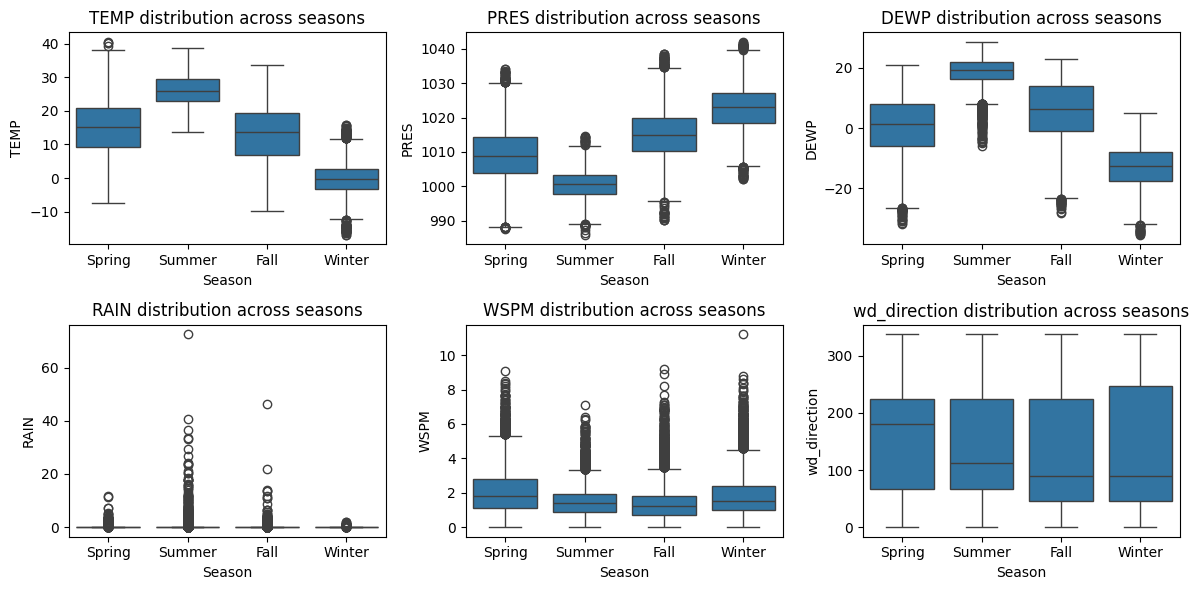

In [118]:
# Seasonal Boxplot Analysis
plt.figure(figsize=(12, 6))
for i, metereological in enumerate(metereologicals, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=cleaned_first_station_df["season"], y=cleaned_first_station_df[metereological])
    plt.title(f"{metereological} distribution across seasons")
    plt.xlabel("Season")
    plt.ylabel(f"{metereological}")
plt.tight_layout()
plt.show()

This boxplot visualization showcases seasonal variations in different weather parameters:
1. **TEMP (Temperature)**
   - Peaks in **summer** and drops in **winter**.
   - Wider range in **spring** and **fall**.
   - Outlier temperature values in winter on both extremes, which is indicative of some very low temperatures and warmer temperatures in winter
   - An outlier temperature point in summer indicating a very high temperature of more than 30
1. **PRES (Pressure)**
   - Lower in **summer**, higher in **winter**.
   - Pressure is spread out in spring
   - There are outliers for all seasons indicating instances of very low and very high pressures.
2. **DEWP (Dewpoint)**
   - Highest in **summer**, lowest in **winter**.
   - Wide range in spring and fall seasons.
3. **RAIN (Rainfall)**
   - Significant outliers in **summer**, indicating extreme events.
   - Overall rainfall is on the lower end for all seasons
4. **WSPM (Wind Speed)**
   - Relatively consistent across seasons with outliers for all seasms indicating some extreme high speed winds.
5. **wd_direction (Wind Direction)**
   - Distributed across 0–360° without much seasonal variation.

#### 6.5.2. Monthly Distribution of Weather

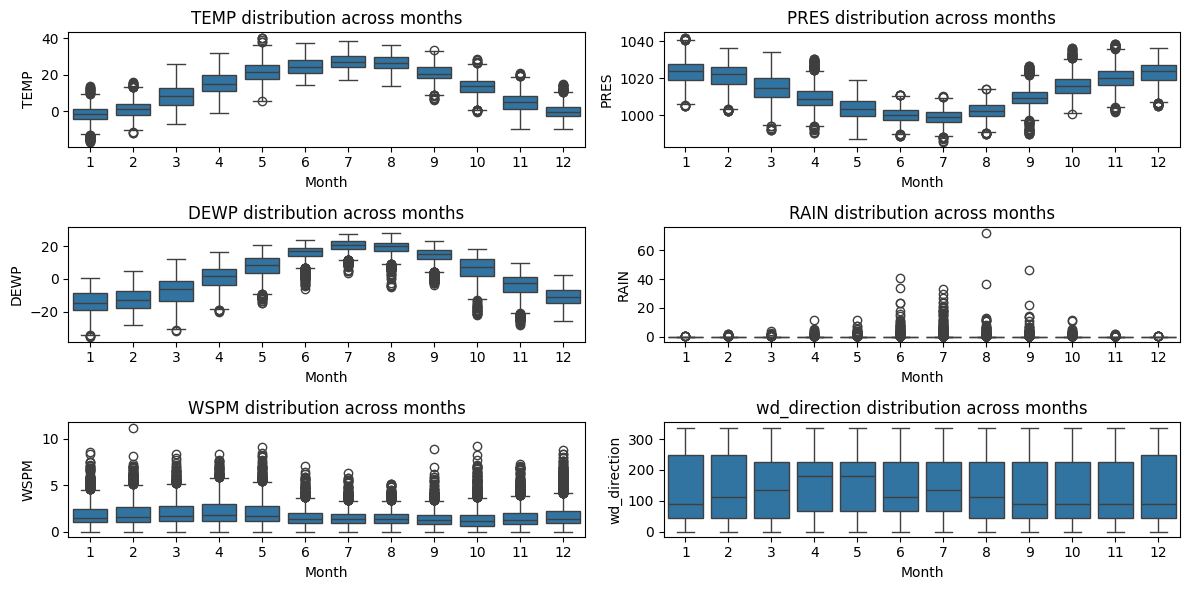

In [ ]:
# Monthly distribution of weather data.
plt.figure(figsize=(12, 6))
for i, metereological in enumerate(metereologicals, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=cleaned_first_station_df["month"], y=cleaned_first_station_df[metereological])
    plt.title(f"{metereological} distribution across months")
    plt.xlabel("Month")
    plt.ylabel(f"{metereological}")
plt.tight_layout()
plt.show()

This visualization presents **box plots** showing the distribution of various meteorological variables across months. 

 **Key Observations from Box Plots:**
1. **Temperature (TEMP)**
   - **Increases from January to July (~40°C max in summer).**
   - **Drops from August to December (~0°C in winter).**
   - Outliers in winter may indicate cold snaps.

2. **Pressure (PRES)**
   - **Decreases from January to June** and **rises from July to December**.
   - More variability in the middle months, possibly due to monsoonal effects.

3. **Dew Point (DEWP)**
   - **Follows temperature trends**—higher in summer, lower in winter.
   - Winter months have more variability and outliers, suggesting fluctuations in humidity.

4. **Rainfall (RAIN)**
   - **Extremely high variability in July and August**—monsoon activity.
   - Most months have very low rainfall except during monsoon peaks.

5. **Wind Speed (WSPM)**
   - **Generally stable, but highest values appear in Spring and Summer.**
   - Some extreme outliers suggest occasional strong wind events.

6. **Wind Direction (wd_direction)**
   - **Consistent distribution across months**.
   - Suggests **a dominant prevailing wind direction** with some seasonal shifts.

 **Overall Insights:**
- **Strong seasonality in temperature, dew point, and pressure.**
- **Monsoon impact is clear in rainfall and pressure fluctuations.**
- **Wind speed and direction remain relatively stable, with occasional extreme events.**

#### 6.5.3. Yearly Distribution of Weather

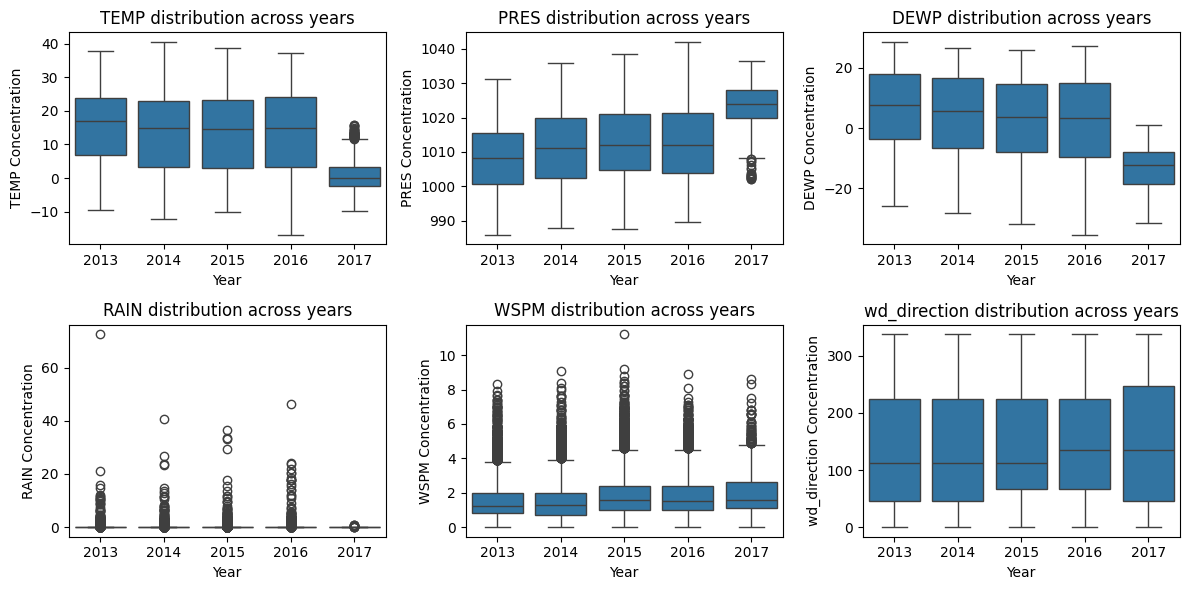

In [ ]:
# Yearly Distribution of weather data
plt.figure(figsize=(12, 6))
for i, metereological in enumerate(metereologicals, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=cleaned_first_station_df["year"], y=cleaned_first_station_df[metereological])
    plt.title(f"{metereological} distribution across years")
    plt.xlabel("Year")
    plt.ylabel(f"{metereological} Concentration")
plt.tight_layout()
plt.show()

This image shows **box plots** illustrating the distribution of various weather parameters (TEMP, PRES, DEWP, RAIN, WSPM, and wd_direction) across different years from **2013 to 2017** in Aotizhongxin. 

**Observations from the Box Plots**:
1. **Temperature (TEMP)**:  
   - The median temperature is relatively consistent across the years.  
   - The range of temperatures (box spread) remains stable.  

2. **Pressure (PRES)**:  
   - There is a slight increase in median pressure from 2013 to 2017.  
   - 2017 shows a more **compressed distribution**, suggesting fewer fluctuations.  

3. **Dew Point (DEWP)**:  
   - Dew point values appear to decline in 2017, with more negative values (suggesting colder, drier air).  

4. **Rainfall (RAIN)**:  
   - Most rainfall values are **near zero**, but extreme outliers (heavy rainfall events) are present, particularly in **2013–2016**.  

5. **Wind Speed (WSPM)**:  
   - The wind speed distribution is relatively stable, but outliers (high wind speeds) are more common in 2013-2016.  

6. **Wind Direction (wd_direction)**:  
   - The range of wind direction is consistent across all years, with a fairly uniform distribution.  

**Overall**:
- **Temperature, pressure, and wind conditions remain fairly stable** over the years.  
- **2017 shows some distinct trends**, particularly **lower DEWP values and reduced variability in PRES**.  
- **Rainfall remains unpredictable**, with occasional extreme events.  

### 6.4. Wind speed and wind direction

In [67]:
# install windrose library. 
# !pip install windrose

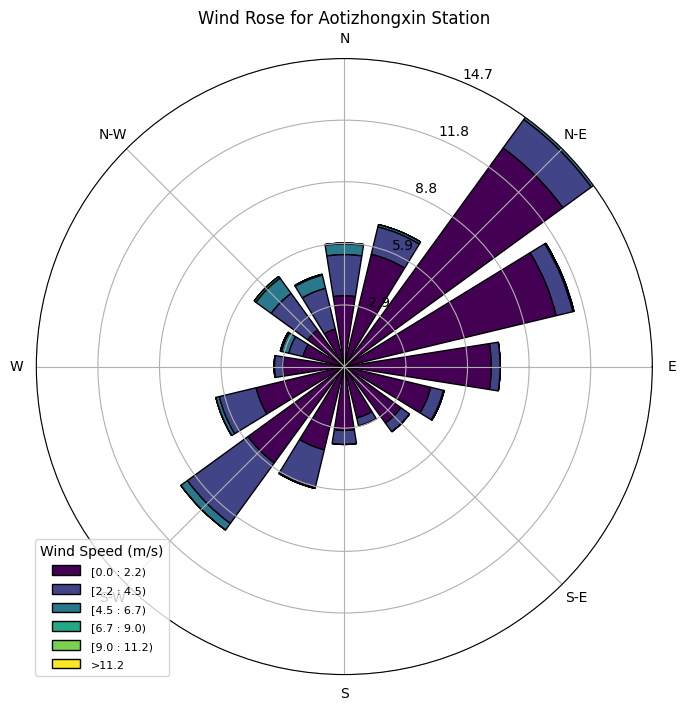

In [122]:
from windrose import WindroseAxes

# Visualization of wind direction and speed distribution using a windrose.
# Ensure wd (wind direction) and WSPM (wind speed) exist
if 'wd_direction' in cleaned_first_station_df.columns and 'WSPM' in cleaned_first_station_df.columns:
    # Remove NaN values
    wind_data = cleaned_first_station_df[['wd_direction', 'WSPM']].dropna()

    # Create windrose plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="windrose")
    ax.bar(
        wind_data['wd_direction'], 
        wind_data['WSPM'], 
        normed=True, 
        opening=0.8, 
        edgecolor='black'
    )

    # Set labels
    ax.set_legend(title="Wind Speed (m/s)")
    plt.title(f"Wind Rose for {first_station_name} Station")
    plt.show()
else:
    print("Error: 'wd' (Wind Direction) or 'WSPM' (Wind Speed) is missing from the dataset.")

**Wind Direction**
- The Northeast (NE) direction has the strongest and most frequent winds. 
- Other significant wind directions include East (E) and South West (SW), but they occur with lower intensity.
- The South and Southwest winds are minimal, indicating limited influence from these directions.
  
**Wind Speed**
- Most winds are weak to moderate:
- 0.0 - 1.6 m/s (dark purple): Light breezes, common and dominant.
- 1.6 - 3.2 m/s (dark blue): Slightly stronger but still moderate.
- 3.2 - 4.8 m/s (blue-green): Less frequent, indicating occasional strong gusts.
- Higher wind speeds (>4.8 m/s) are rare.
  
**Implications**
- Air Pollution Dispersion: Pollutants from industrial zones or traffic are likely transported in these dominant directions, impacting air quality in downwind areas.
- Air Quality Control: Low wind speeds (common here) can lead to stagnation of pollutants, causing higher pollution levels, especially in winter when temperature inversions occur.

In [129]:
cleaned_first_station_df.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'wd_direction',
       'season'],
      dtype='object')

### 6.5. Comparison of pollutants and wind direction

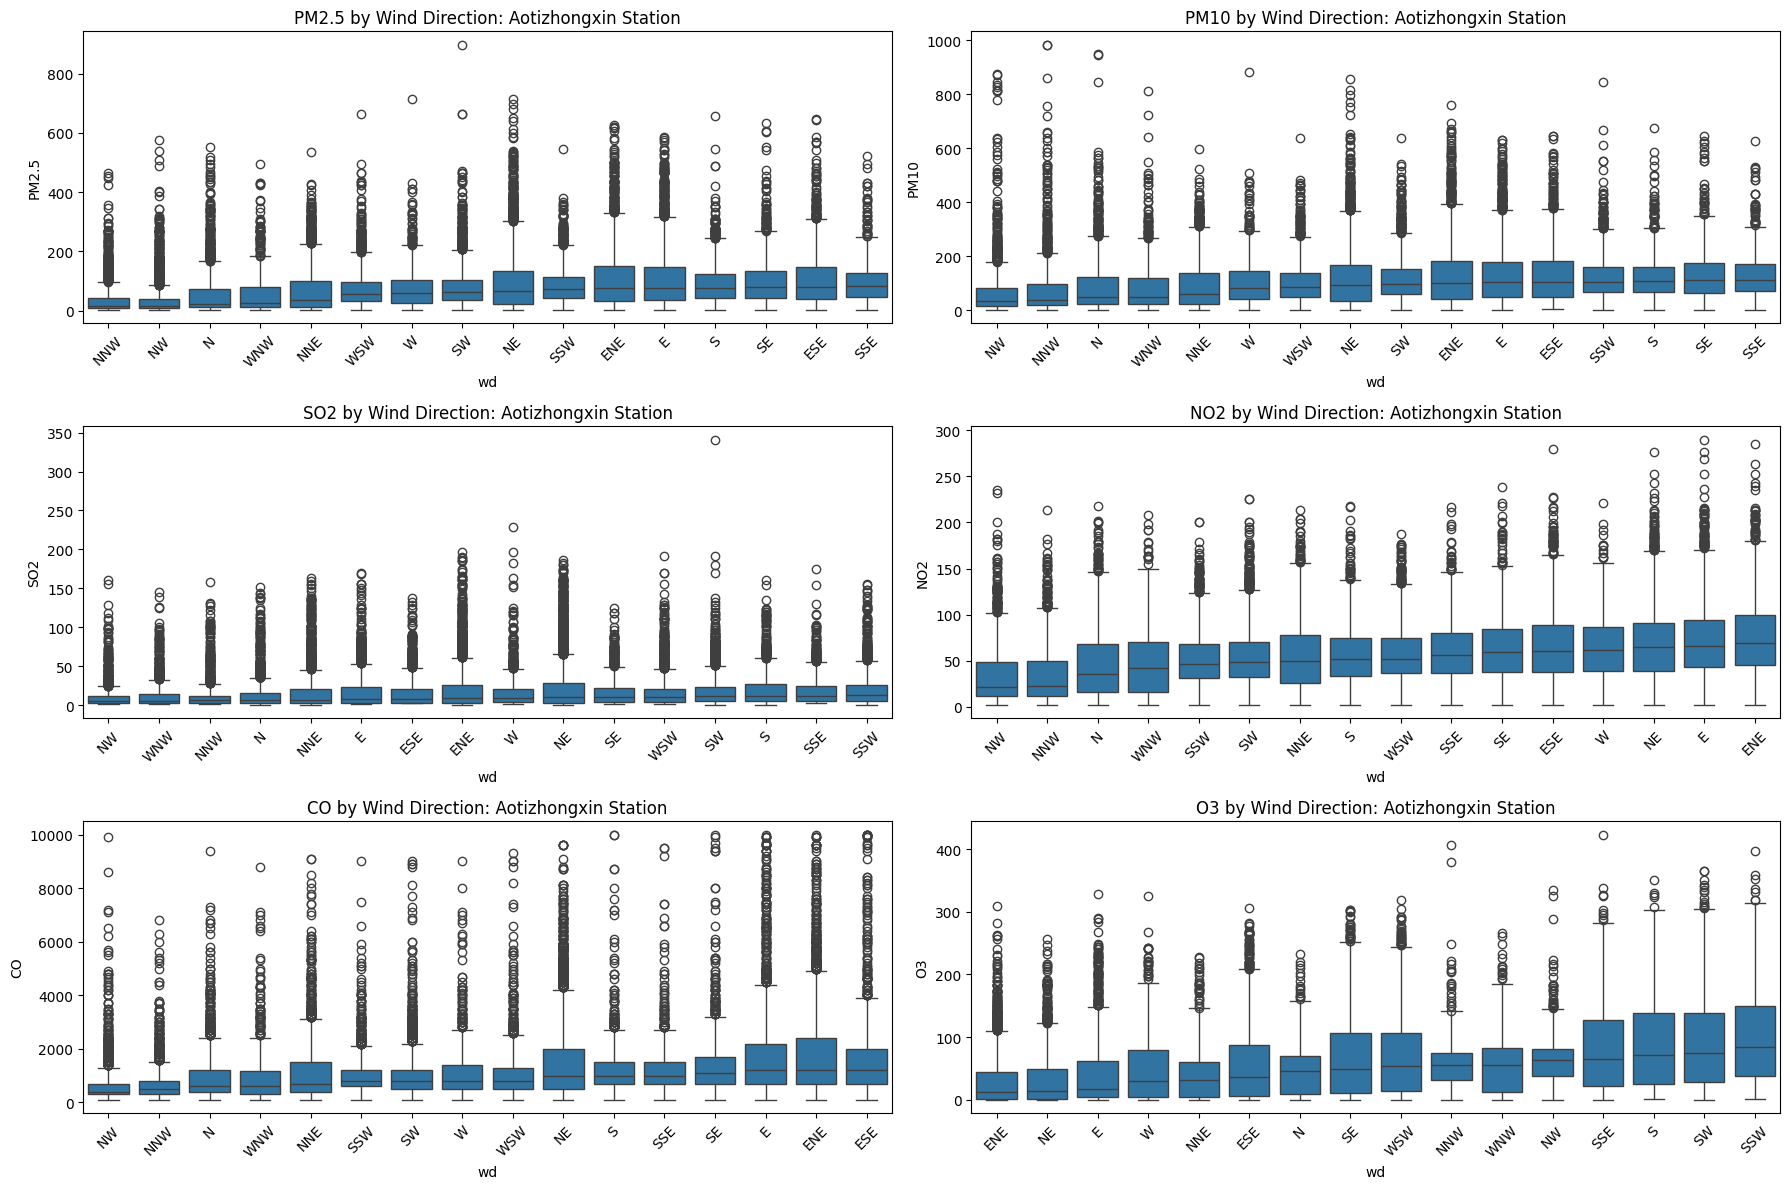

In [131]:
# Create boxplots to show pollution concentration per wind direction
plt.figure(figsize=(18, 12))

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)

    # Order wind directions by median pollution concentration (highest to lowest)
    sorted_wd = (
        cleaned_first_station_df.groupby("wd")[pollutant]
        .median()
        .sort_values(ascending=True)
        .index
    )

    sns.boxplot(
        x=cleaned_first_station_df["wd"],
        y=cleaned_first_station_df[pollutant],
        order=sorted_wd
    )

    plt.title(f"{pollutant} by Wind Direction: {first_station_name} Station")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Interpretation of the Boxplots: Pollution Concentration by Wind Direction**

These boxplots illustrate the distribution of different pollutant concentrations for each wind direction at the **Aotizhongxin Station**.

**Key Observations:**
1. **PM2.5:**
   - Higher concentrations are associated with SSE, ESE & SE wind directions.
   - These directions likely bring polluted air from industrial or urban areas.
   - The **wide interquartile range (IQR)** and numerous **outliers** indicate fluctuating pollution levels, possibly due to varying atmospheric conditions.

2. **PM10:**
   - Higher concentrations are associated with SSE, SE & S wind directions.
   - These directions likely bring polluted air from industrial or urban areas.
   - The **wide interquartile range (IQR)** and numerous **outliers** indicate fluctuating pollution levels, possibly due to varying atmospheric conditions.
  
3. **SO2**
   - **SO2 (Sulfur Dioxide)** levels are **higher in the South direction**.
   - This pollutant mainly originates from combustion sources (e.g., **power plants, traffic, and industry**), suggesting that emissions sources might be located in this direction relative to the station.

4. **NO2**
   - **NO2 (Nitrogen Dioxide)** levels are **higher in the East-Northeastern direction**.
   - This pollutant mainly originates from combustion sources (e.g., **power plants, traffic, and industry**), suggesting that emissions sources might be located in this direction relative to the station.
  
5. **CO (Carbon Monoxide):**
   - **ENE (East-Northeast) shows the highest CO levels**, indicating a dominant pollution source in that direction.
   - Significant variation with **high outliers** suggests episodic pollution events (e.g., traffic congestion, biomass burning, or industrial activity).

6. **O3 (Ozone):**
   - Unlike primary pollutants (PM, NO2, CO), **ozone (O3) is secondary**, forming through photochemical reactions.
   - Higher levels appear **under SSW & SW winds**, potentially indicating areas with more **sunlight exposure** and **fewer NO2 emissions**, which can otherwise scavenge ozone.

**Implications:**
- The **dominant wind directions influencing pollution levels** appear to be **ENE, ESE, and S**, suggesting these are key transport pathways for pollutants.
- **High pollution levels from the east and south** may indicate industrial zones, urban centers, or highways in those areas.
- **Low pollution levels in NW and N** suggest these directions bring cleaner air, possibly from natural or less populated areas.

### 6.6. Temperature versus Pollutants

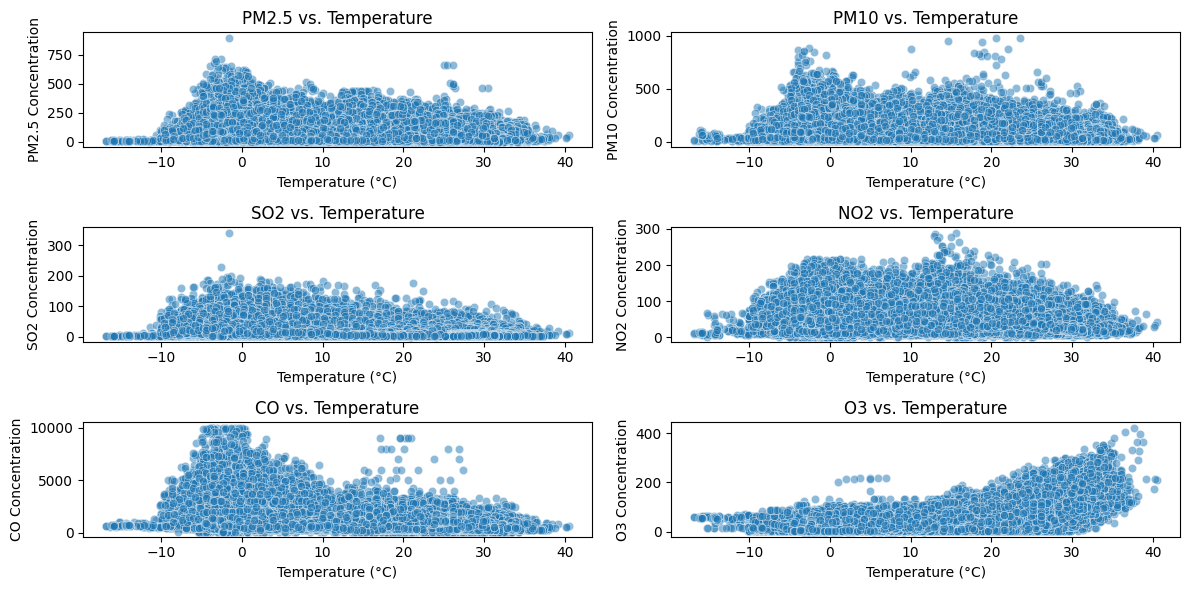

In [132]:
# Temperature vs. Pollutants (Scatter Plots)
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=cleaned_first_station_df["TEMP"], y=cleaned_first_station_df[pollutant], alpha=0.5)
    plt.title(f"{pollutant} vs. Temperature")
    plt.xlabel("Temperature (°C)")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

1. PM2.5 vs. Temperature:
- Higher concentrations are observed at lower temperatures (between -5 & 0°C).
- A decreasing trend in PM2.5 as temperature increases suggests that cold weather worsens fine particulate pollution, likely due to inversions, heating emissions, and stagnant air in winter.
2. PM10 vs. Temperature:
- Similar to PM2.5, higher levels are concentrated in colder temperatures (between -5 & 0°C).
- Likely caused by increased coal/wood burning, lower dispersion, and higher emission sources during winter.
3. SO2 vs. Temperature:
- Strong inverse relationship: higher SO2 levels at lower temperatures.
- SO2 is typically linked to coal combustion and industrial heating, which increases in colder months.
4. NO2 vs. Temperature:
- Concentrations are generally higher in lower temperatures and decrease as temperature rises.
- NO2 is linked to vehicular and heating emissions, which tend to be higher in winter.
5. CO vs. Temperature:
- A very strong inverse relationship: high CO levels occur at lower temperatures.
- Cold weather increases incomplete combustion (e.g., vehicle emissions, wood burning) and reduces air dispersion.
6. O3 vs. Temperature:
- Opposite trend to other pollutants: Ozone (O3) increases with temperature.
- This aligns with the fact that ozone is formed through photochemical reactions, which are more active at higher temperatures.
  
Overall Insights:
- PM2.5, PM10, SO2, NO2, and CO are negatively correlated with temperature, meaning their levels are higher in cold weather due to combustion sources and poor air dispersion.
- O3 is positively correlated with temperature, as it forms more efficiently in warm, sunny conditions.
- hese trends reflect typical seasonal pollution patterns: higher particulate and gas pollutants in winter, and higher ozone levels in summer.

### 6.7. Pollutants versus pressure

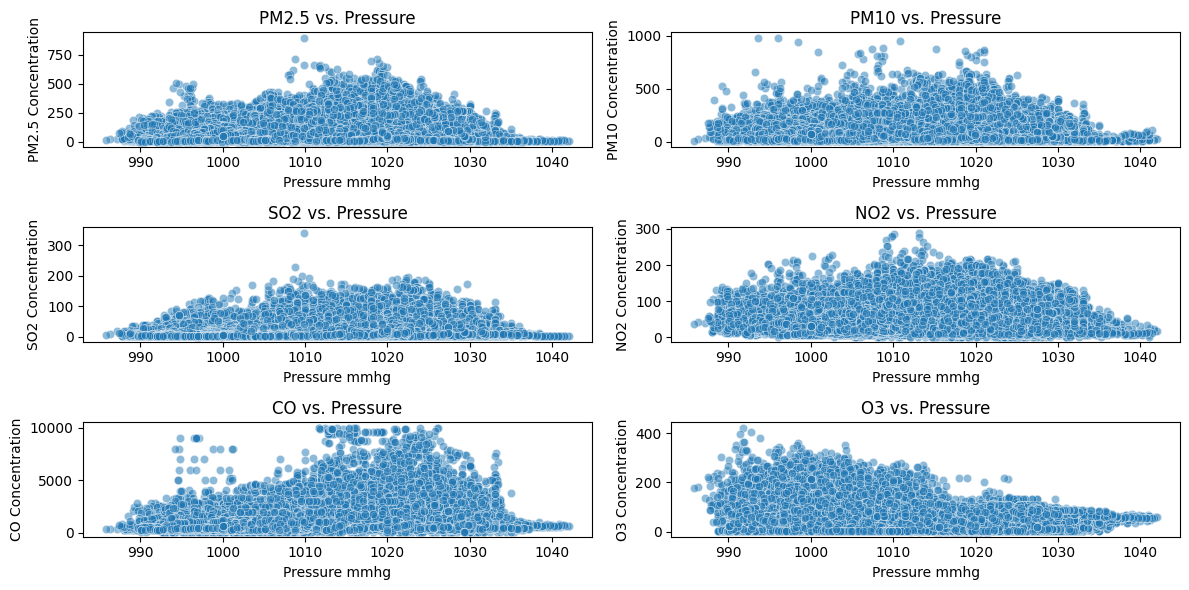

In [81]:
# Pressure vs. Pollutants (Scatter Plots)
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=cleaned_first_station_df["PRES"], y=cleaned_first_station_df[pollutant], alpha=0.5)
    plt.title(f"{pollutant} vs. Pressure")
    plt.xlabel("Pressure mmhg")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

Key Observations for Each Pollutant:
1. **PM2.5 vs. Pressure:**
   - PM2.5 levels appear slightly **higher at mid-range pressures (1000–1020 hPa)**.
   - There is no **strong linear trend**, but higher PM2.5 levels may indicate atmospheric stability at certain pressures.

2. **PM10 vs. Pressure:**
   - Similar pattern to PM2.5, where PM10 is slightly more concentrated around **1000–1020 hPa**.
   - This suggests a potential link between stable atmospheric conditions and particle accumulation.

3. **SO2 vs. Pressure:**
   - No strong trend, but slightly **higher SO2 levels at mid-range pressures**.
   - SO2 tends to stay in the lower atmosphere under stable conditions, meaning higher concentrations can occur under **higher pressure systems with low air circulation**.

4. **NO2 vs. Pressure:**
   - Similar pattern to SO2, with **higher concentrations around 1000–1020 hPa**.
   - NO2, being a traffic-related pollutant, could accumulate under high-pressure conditions when dispersion is limited.

5. **CO vs. Pressure:**
   - CO levels show a **slight increase at mid-range pressures**.
   - This could be due to cold weather and stagnant air conditions during high-pressure events, leading to pollution buildup.

6. **O3 vs. Pressure:**
   - Ozone levels appear **higher at lower pressures and decrease at higher pressures**.
   - This aligns with the fact that **ozone forms more effectively in unstable, low-pressure conditions where sunlight and photochemical reactions are stronger**.
  
**Overall Insights:**
- **PM2.5, PM10, SO2, NO2, and CO show a slight increase in concentration at mid-range pressures (~1000–1020 hPa)**, suggesting **pollutant accumulation under stable atmospheric conditions**.
- **O3 decreases with increasing pressure**, which supports the idea that **low-pressure conditions promote photochemical ozone formation**.

### 6.8. Pollutants versus dewpoint

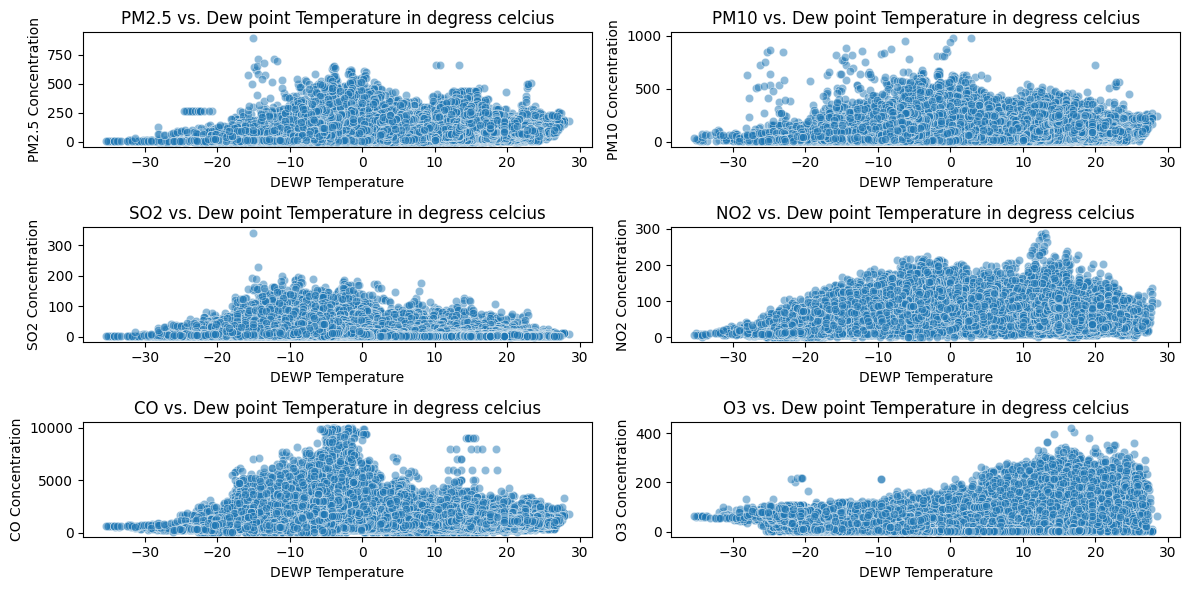

In [82]:
# Pressure vs. Pollutants (Scatter Plots)
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=cleaned_first_station_df["DEWP"], y=cleaned_first_station_df[pollutant], alpha=0.5)
    plt.title(f"{pollutant} vs. Dew point Temperature in degress celcius")
    plt.xlabel("DEWP Temperature")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

1. **General Trends**:  
   - Most pollutants seem to have higher concentrations at lower dew points (negative or near zero values).  
   - As dew point increases, pollutant concentrations appear to spread out more, especially for CO and O3.  

2. **CO and O3 Distinct Behavior**:  
   - CO concentrations have significant spikes at low dew points, suggesting that colder conditions might trap CO emissions.  
   - O3 concentration increases as dew point rises, indicating a possible link between ozone formation and humidity.  

3. **Particulate Matter (PM2.5, PM10)**:  
   - These appear to have a denser cluster in the middle dew point range (around -10°C to 10°C).  
   - At very low dew points, PM concentrations drop, possibly due to reduced atmospheric moisture affecting particle suspension.  

4. **SO2** 
   - Higher concentrations are seen at lower dew points, indicating stronger emissions or accumulation in drier and colder air.  

5. **NO2:**
- Higher concentrations at dew point range of -10 to around 15°C indicating stronger emissions or accumulation in drier and colder air. 

### 6.9. Pollutants versus rainfall

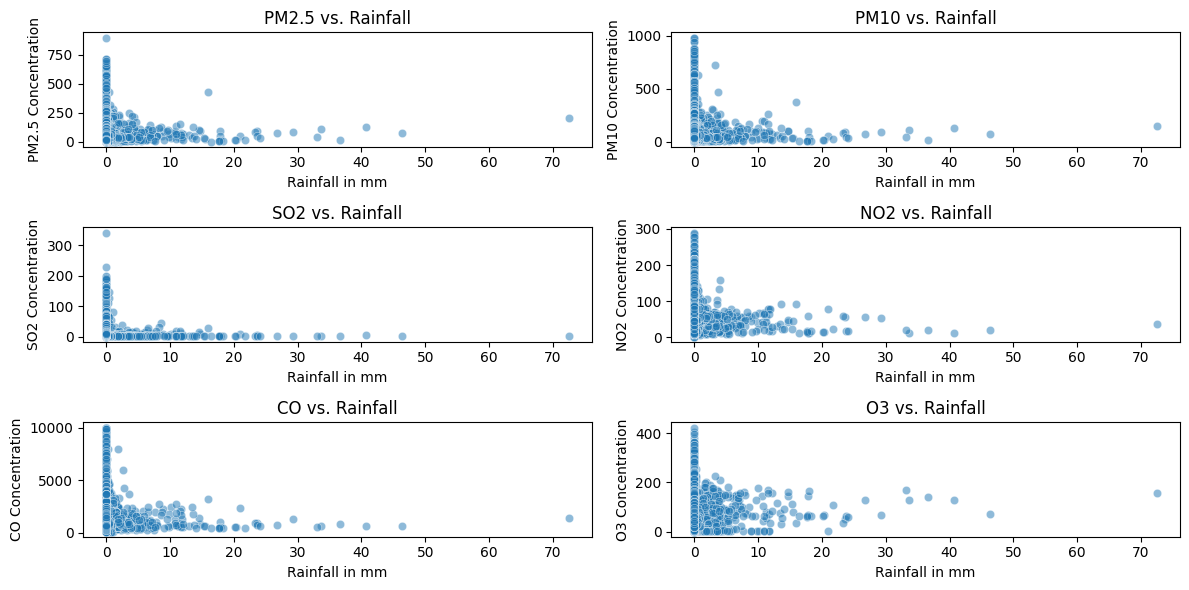

In [83]:
# Pressure vs. Pollutants (Scatter Plots)
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=cleaned_first_station_df["RAIN"], y=cleaned_first_station_df[pollutant], alpha=0.5)
    plt.title(f"{pollutant} vs. Rainfall")
    plt.xlabel("Rainfall in mm")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

The scatter plots illustrate the relationship between **rainfall** and the concentration of various air pollutants (**PM2.5, PM10, SO2, NO2, CO, and O3**).

**1. General Trend: Negative Correlation**
- Across all plots, we observe a clear **negative correlation** between **rainfall** and pollutant concentration.
- High pollution levels are concentrated at **low rainfall values (near 0 mm)**.
- As **rainfall increases**, pollutant concentrations drop significantly, confirming the **"rain scavenging effect"**.

**Scientific Explanation:**  
- **Wet Deposition:** Rain droplets capture airborne pollutants and remove them from the atmosphere.
- **Particle Settling:** Increased humidity and precipitation enhance the settling of particulate matter (PM).
- **Gas Absorption:** SO₂, NO₂, and CO dissolve in rainwater, reducing their presence in the air.

**2. Individual Pollutant Analysis**
**A. Particulate Matter (PM2.5 & PM10)**
- **Sharp decline with rainfall:** Indicates that rain is highly effective at **removing PM from the air**.
- **High PM values at 0 mm rainfall:** Suggests that on dry days, pollution accumulates due to stagnant air conditions.

**B. Sulfur Dioxide (SO₂)**
- **High SO₂ levels at low rainfall**, then drops sharply.
- This supports the fact that SO₂ is highly **soluble in water** and efficiently removed by rain.

#**C. Nitrogen Dioxide (NO₂)**
- **Follows the same pattern as SO₂**, showing a sharp decline after rainfall starts.
- NO₂ is also **water-soluble**, meaning precipitation effectively reduces its concentration.
- **Lower NO₂ levels after rainfall** reduce **ozone (O₃) formation** since NO₂ is a precursor to O₃.

**D. Carbon Monoxide (CO)**
- CO concentrations **drop after rainfall** but not as drastically as PM or SO₂.
- Unlike SO₂ and NO₂, **CO is not highly soluble in water**, meaning rain is less effective in removing it.
- CO reduction is likely due to **better atmospheric mixing** rather than direct rain removal.

**E. Ozone (O₃)**
- Unlike other pollutants, O₃ shows **more of a scattered pattern**
- **O₃ is not directly washed away by rain**; instead, its formation depends on **sunlight and NO₂ levels**.
- Some O₃ values remain high even during rainfall, indicating **complex photochemical interactions**.

**3. Final Conclusions & Key Takeaways**
- **Rainfall is a natural air purifier**, especially for PM2.5, PM10, SO₂, and NO₂.  
- **CO and O₃ are less affected**, requiring different pollution control measures.  

### 6.10. Pollutants versus windspeed

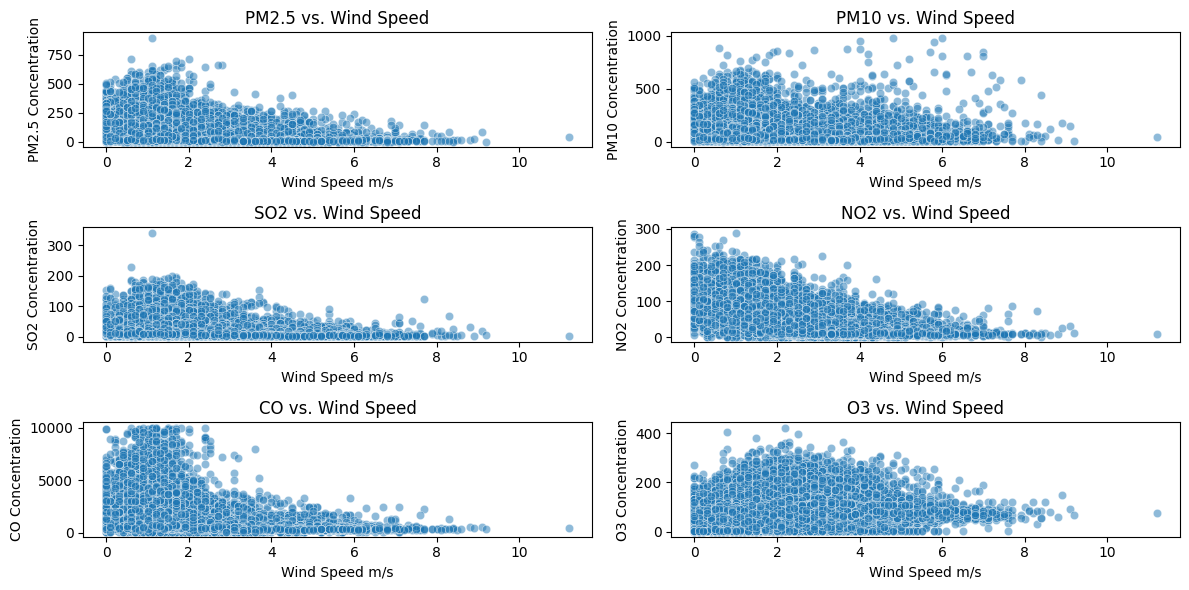

In [84]:
# Pressure vs. Pollutants (Scatter Plots)
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=cleaned_first_station_df["WSPM"], y=cleaned_first_station_df[pollutant], alpha=0.5)
    plt.title(f"{pollutant} vs. Wind Speed")
    plt.xlabel("Wind Speed m/s")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

These scatter plots analyze the relationship between **wind speed** and various air pollutants (**PM2.5, PM10, SO₂, NO₂, CO, and O₃**).
**1. General Trend: Negative Correlation**
- All pollutants show a **decreasing trend with increasing wind speed**.
- **Higher concentrations occur at low wind speeds (below 2 m/s)**.
- As wind speed increases, pollutant concentrations **drop significantly**.

    **Scientific Explanation:**  
  - **Dispersion Effect:** Higher wind speeds enhance the **dispersion and dilution of pollutants**.
  - **Transport Mechanism:** Wind carries pollutants away from the source, reducing localized pollution.
  - **Mixing Efficiency:** Stronger winds improve atmospheric mixing, reducing pollutant accumulation.

**2. Individual Pollutant Analysis**
**A. Particulate Matter (PM2.5 & PM10)**
- **Higher PM concentrations are found at lower wind speeds (<2 m/s).**
- **PM levels drop significantly as wind speed increases beyond 3-4 m/s.**
- This suggests that wind is highly effective in dispersing PM pollutants.

    **Implications:**
  - **Low wind speeds** lead to pollution build-up, especially in urban areas.
  - **High wind speeds help clear PM pollution**, improving air quality.

**B. Sulfur Dioxide (SO₂)**
- **Higher SO₂ concentrations are seen at low wind speeds.**
- **At wind speeds >3 m/s, SO₂ levels decline sharply.**
- This indicates that SO₂ is **highly affected by wind dispersal**.

    **Implications:**
  - **Industrial emissions (power plants, factories) are major SO₂ sources**.
  - Wind direction plays a critical role in **transporting SO₂ away from emission sources**.

**C. Nitrogen Dioxide (NO₂)**
- **High NO₂ at low wind speeds, decreasing with higher wind speeds.**
- This follows the same pattern as SO₂ since NO₂ comes from **vehicle emissions & industrial sources**.

    **Implications:**
  - **Stagnant air conditions (low wind speeds) lead to NO₂ accumulation.**
  - **Traffic-heavy cities suffer from NO₂ pollution in calm weather.**
  
**D. Carbon Monoxide (CO)**
- **CO levels are high at low wind speeds and drop as wind increases.**
- However, the decline is **less sharp compared to PM or SO₂**.

    **Explanation:**
  - CO is a **lighter gas and not as easily washed out** as PM.
  - **Wind disperses CO gradually** rather than removing it completely.

    **Implications:**: CO pollution is **persistent in calm weather conditions**.

**E. Ozone (O₃)**
- **Unlike other pollutants, O₃ does not show a strong negative trend.**
- **O₃ levels are more scattered**, indicating a complex relationship with wind speed.

    **Explanation:**
  - O₃ is **formed through photochemical reactions**, rather than direct emissions.
  - **Higher wind speeds can bring in O₃ from surrounding areas**, leading to mixed effects.

**3. Final Conclusions & Key Takeaways**
- **Wind disperses most pollutants effectively, especially PM, SO₂, and NO₂.**  
- **Low wind speeds cause pollution accumulation, leading to poor air quality.**  
- **CO and O₃ are less affected by wind speed, requiring different control strategies.**  

### 6.11 Correlation between pollutants and metereological parameters

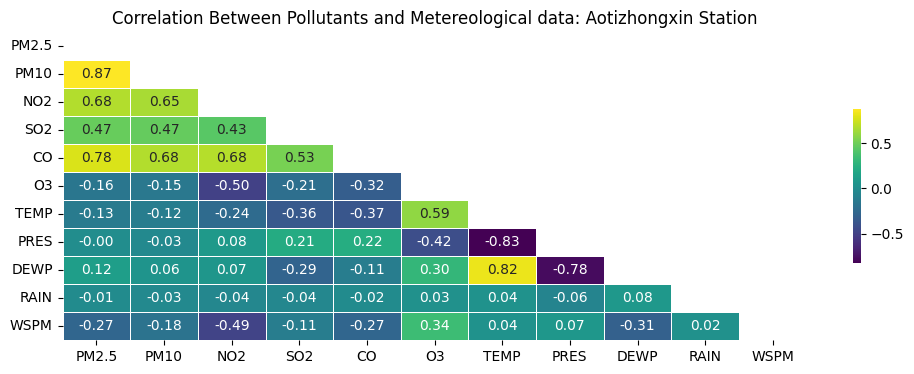

In [133]:
# Select relevant variables
columns = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3",'TEMP','PRES','DEWP','RAIN','WSPM']
df_corr = cleaned_first_station_df[columns].dropna()

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='viridis', linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.5})
plt.title(f"Correlation Between Pollutants and Metereological data: {first_station_name} Station")
plt.show()

**Interpretation of the Correlation Heatmap: Pollutants & Meteorological Factors**
This heatmap illustrates the correlation between air pollutants and meteorological variables at **Aotizhongxin Station**.

**Key Observations:**
1. **Strong Positive Correlations:**
   - **PM2.5 and PM10 (0.87):** These pollutants have a very strong correlation, as both originate from similar sources (e.g., combustion, traffic, industrial emissions).
   - **CO and PM2.5 (0.78) / PM10 (0.68):** Carbon monoxide (CO) is highly correlated with PM2.5 and PM10, indicating **common emission sources**, such as vehicular and industrial activities.
   - **NO2 and PM2.5 (0.68) / PM10 (0.65):** NO2 often comes from combustion processes (e.g., traffic emissions), which also contribute to PM levels.
   - CO and  NO2 (0.68): positive correlation that suggests a moderately strong relationship. This means that as the concentration of CO increases, the concentration of NO2 tends to increase as well, and vice versa. This indicates **common emission sources**, such as vehicular and industrial activities or combustion activities. 
   - Temperature and Ozone (0.59): positive correlation: suggests a moderate relationship. This means that as temperature increases, ozone levels tend to rise as well, and vice versa. This relationship often occurs because ozone formation is temperature-dependent.

2. **Negative Correlations (Pollution vs. Meteorological Factors):**
   - **Pressure (PRES) & Pollution:** 
     - **Strong negative correlation with PM2.5 (-0.07), PM10 (0.03), NO2 (0.04), and CO (0.26).**
     - **Higher pressure (anticyclonic conditions) is generally associated with stable atmospheric conditions, trapping pollutants near the surface.**
   - **Wind Speed (WSPM) & Pollution:** 
     - **Negative correlation with PM2.5 (-0.23), PM10 (-0.14), and CO (-0.47).**
     - **Stronger winds help disperse pollutants, reducing concentrations.**
   - **Temperature (TEMP) & Pollution:**
     - **Weak negative correlation with PM2.5 (-0.19), PM10 (-0.16), and NO2 (-0.17).**
     - Higher temperatures may lead to better pollutant dispersion, but can also contribute to **O3 formation**.

3. **Ozone (O3) Correlations:**
   - **Negative with NO2 (-0.58) and CO (-0.36):** NO2 plays a role in ozone formation, but in high concentrations, it can also remove ozone from the air.
   - **Positive with Temperature (0.50):** Higher temperatures and sunlight enhance photochemical reactions that produce ozone.

4. **Dew Point (DEWP) & Relative Humidity Effects:**
   - **Dew Point strongly correlates with Temperature (0.89)** and has a **negative correlation with Pressure (-0.80).**
   - **This suggests that lower-pressure systems bring moist air, potentially impacting pollution levels through condensation and washout effects.**

5. **Rainfall (RAIN) & Pollution:**
   - **Weak correlations with all pollutants (~ -0.05 to 0.09), suggesting that rainfall has a minor effect on air quality at this station.**
   - While rain can help wash out particulate matter, other factors (e.g., wind speed, emission rates) may play a more dominant role.

**Conclusions:**
- **Higher wind speed helps reduce pollution levels.**
- **Higher pressure tends to trap pollutants near the surface, worsening air quality.**
- **Temperature positively impacts O3 formation but does not strongly impact particulate pollutants.**
- **Rainfall does not show a significant impact on pollution reduction, suggesting localized sources might dominate.**

In [134]:
# save the dataframe to use for forecasting as a csv file.
cleaned_first_station_df.to_csv('Aotizhongxin_data.csv', index=True)